<a href="https://colab.research.google.com/github/Svanzi/MusicGenreClassification/blob/main/Classification_Medium_Best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analisys

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace the URL with the direct link to the raw csv file
url = "https://raw.githubusercontent.com/Juanfra21/Data-Science/main/Final-Project/spotify_dataset.csv"

# Load data from the csv file into a pandas DataFrame
df = pd.read_csv(url).iloc[:,1:]

# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Print the table
df

track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name                  track_name  popularity  \
0                                                  Comedy                      Comedy          73   
1                                        Ghost (Acoustic)            Ghost - Acoustic          55   
2                                          To Begin Again              To Begin Again          57   
3       Crazy Rich Asians (Original Motion Picture Sou...  Can't Help Falling In Love          71   
4                                                 Hold On                     Hold On          82   
...                                                   ...                         ...         ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...         Sleep My Little Boy          21   
113996  #mindfulness - Soft Rain for Mindful Meditatio...            Water Into Light          22   
113997                                            Best Of              Miss Perfumado          22   
113998                                  Change Your World                     Friends          41   
113999                                     Miss Perfumado                   Barbincor          22   

        duration_ms  explicit  danceability  energy  key  loudness  mode  speechiness  \
0            230666     False         0.676  0.4610    1    -6.746     0       0.1430   
1            149610     False         0.420  0.1660    1   -17.235     1       0.0763   
2            210826     False         0.438  0.3590    0    -9.734     1       0.0557   
3            201933     False         0.266  0.0596    0   -18.515     1       0.0363   
4            198853     False         0.618  0.4430    2    -9.681     1       0.0526   
...             ...       ...           ...     ...  ...       ...   ...          ...   
113995       384999     False         0.172  0.2350    5   -16.393     1       0.0422   
113996       385000     False         0.174  0.1170    0   -18.318     0       0.0401   
113997       271466     False         0.629  0.3290    0   -10.895     0       0.0420   
113998       283893     False         0.587  0.5060    7   -10.889     1       0.0297   
113999       241826     False         0.526  0.4870    1   -10.204     0       0.0725   

        acousticness  instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0             0.0322          0.000001    0.3580   0.7150   87.917               4     acoustic  
1             0.9240          0.000006    0.1010   0.2670   77.489               4     acoustic  
2             0.2100          0.000000    0.1170   0.1200   76.332               4     acoustic  
3             0.9050          0.000071    0.1320   0.1430  181.740               3     acoustic  
4             0.4690          0.000000    0.0829   0.1670  119.949               4     acoustic  
...              ...               ...       ...      ...      ...             ...          ...  
113995        0.6400          0.928000    0.0863   0.0339  125.995               5  world-music  
113996        0.9940          0.976000    0.1050   0.0350   85.239               4  world-music  
113997        0.8670          0.000000    0.0839   0.7430  132.378               4  world-music  
113998        0.3810          0.000000    0.2700   0.4130  135.

## Data Set info

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

## Class Distribution

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64


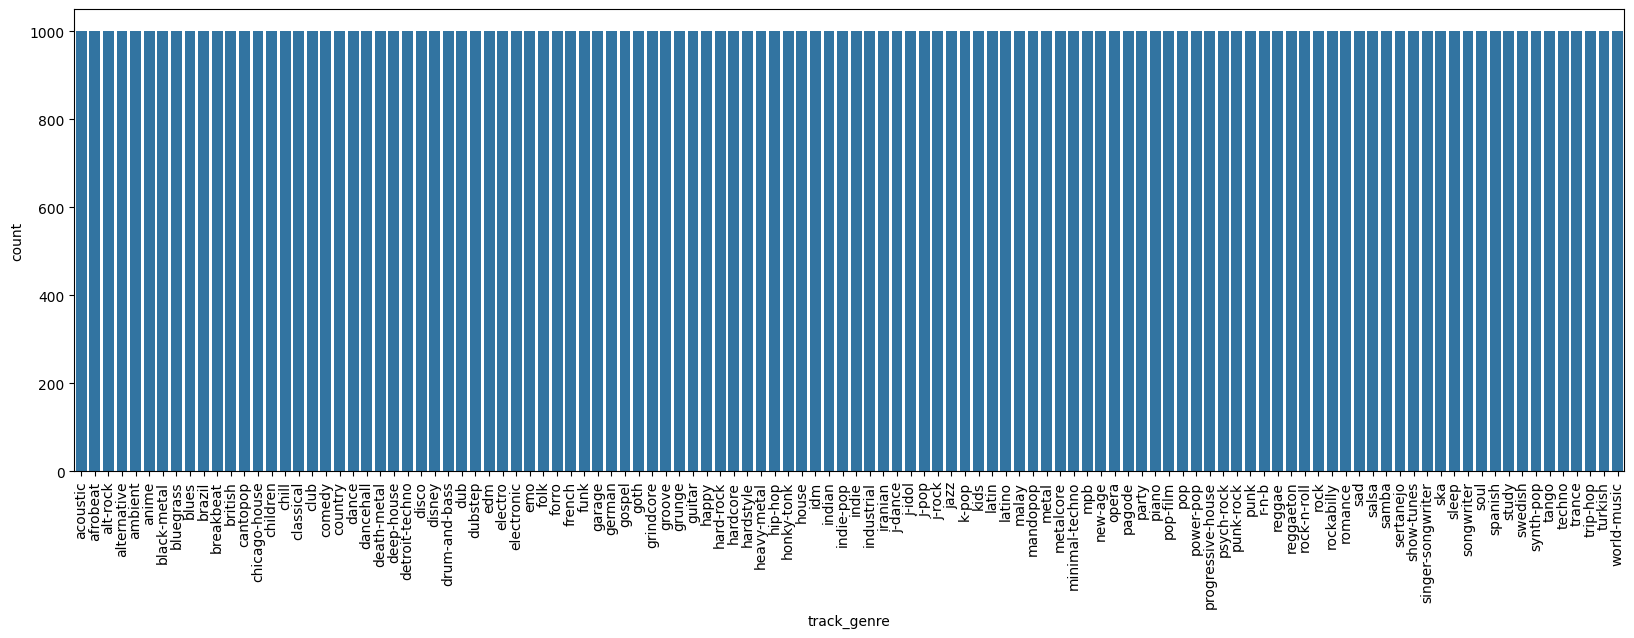

In [ ]:
print(df['track_genre'].value_counts())
plt.figure(figsize=(20, 6))
sns.countplot(x='track_genre', data=df)
plt.xticks(rotation=90)
plt.show()

As we can see the dataset is perfectly balanced on music genres.

##Missing and Duplicated Values

In [ ]:
# Missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

# Duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Print rows with missing values
for column in df.columns:
    if df[column].isnull().any():
        print(f"\nRows with missing values in '{column}':")
        print(df[df[column].isnull()])

Missing values per column:
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Number of duplicate rows: 450

Rows with missing values in 'artists':
                     track_id artists album_name track_name  popularity  duration_ms  explicit  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0            0     False   

       danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
65900         0.501   0.583    7     -9.46     0       0.0605          0.69           0.00396   

       liveness  valence    tempo  time_signature track_g

There are some duplicates among the features and a row with 'NaN' 'artists', 'album_name' and 'track_name' feature.
Let's drop them:

In [ ]:
df = df.drop_duplicates()

# Duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

df = df.dropna()

# Missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values)


Number of duplicate rows: 0
Missing values per column:
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


So in total 451 rows has been removed from the original dataframe.

## Correlation Matrix

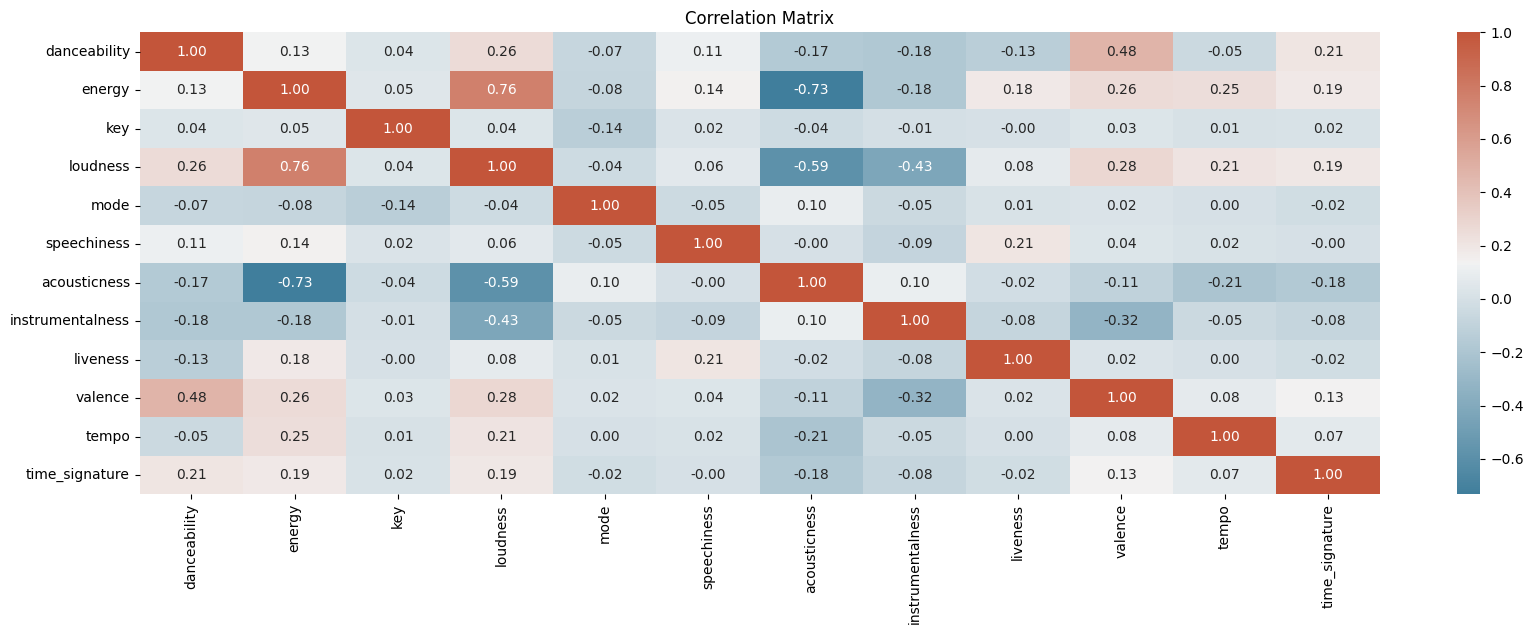

In [ ]:
df_corr = df.drop(columns=['track_id','artists','album_name','track_name','popularity','duration_ms','explicit','track_genre'])
plt.figure(figsize=(20,6))
plt.title("Correlation Matrix")
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#draws heatmap with input as the correlation matrix calculted by(df.corr())
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap=cmap, linewidths=.0)
plt.show()

##Similarities and Differences between Categories


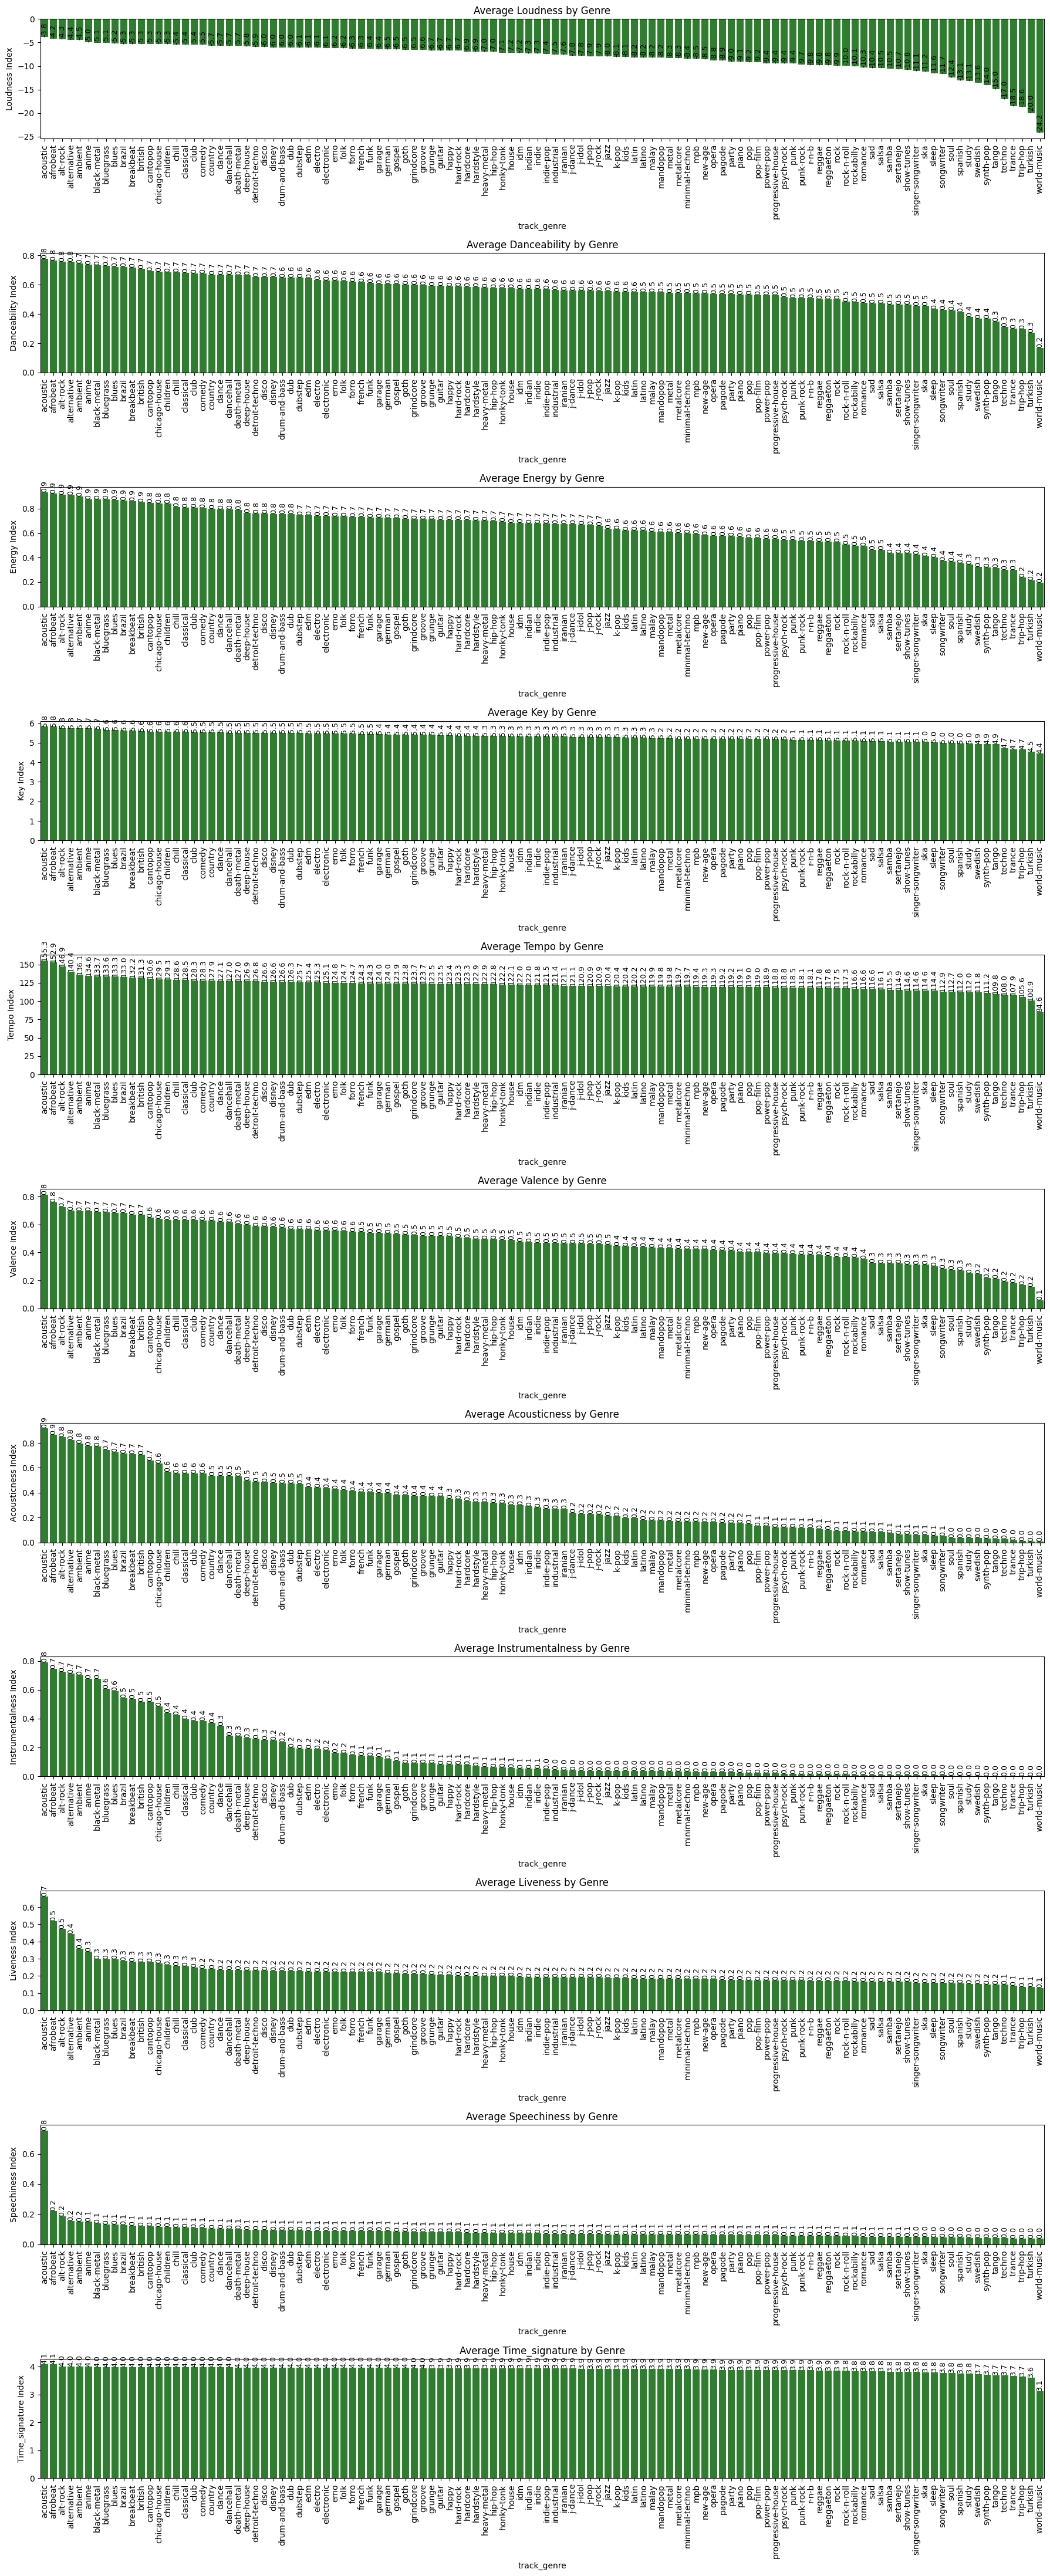

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

average_df = df.groupby('track_genre').agg({
    'loudness': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'key': 'mean',
    'tempo': 'mean',
    'valence': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'speechiness': 'mean',
    'time_signature': 'mean'
})

# Create a list of column names for easier handling
columns = ['loudness', 'danceability', 'energy', 'key', 'tempo', 'valence',
           'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'time_signature']

# Create a dictionary to hold the sorted DataFrames
sorted_df = {col: average_df.sort_values(by=col, ascending=False) for col in columns}

# Function to annotate the bars with the values
def annotate_bars(ax, data, column_name, rotate=False):
    for bar, genre in zip(ax.patches, data.index):
        value = data.loc[genre, column_name]
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{value:.1f}',
            ha='center', va='bottom',
            fontsize=9, color='black', rotation=90
        )

# Create the subplots
n_plots = len(columns)
fig, axes = plt.subplots(n_plots, 1, figsize=(18, 4 * n_plots))

# Loop over the columns and plot each one
for i, col in enumerate(columns):
    sns.barplot(x=average_df.index, y=col, data=sorted_df[col], ax=axes[i], color='forestgreen')
    axes[i].set_title(f'Average {col.capitalize()} by Genre')
    axes[i].set_ylabel(f'{col.capitalize()} Index')
    axes[i].tick_params(axis='x', rotation=90)
    annotate_bars(axes[i], sorted_df[col], col, rotate=(col == 'loudness'))

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()


Many genres had high similarities between them, making it difficult for a model to classify them accurately. Wee will need to work a little bit more on the data of the dataframe.

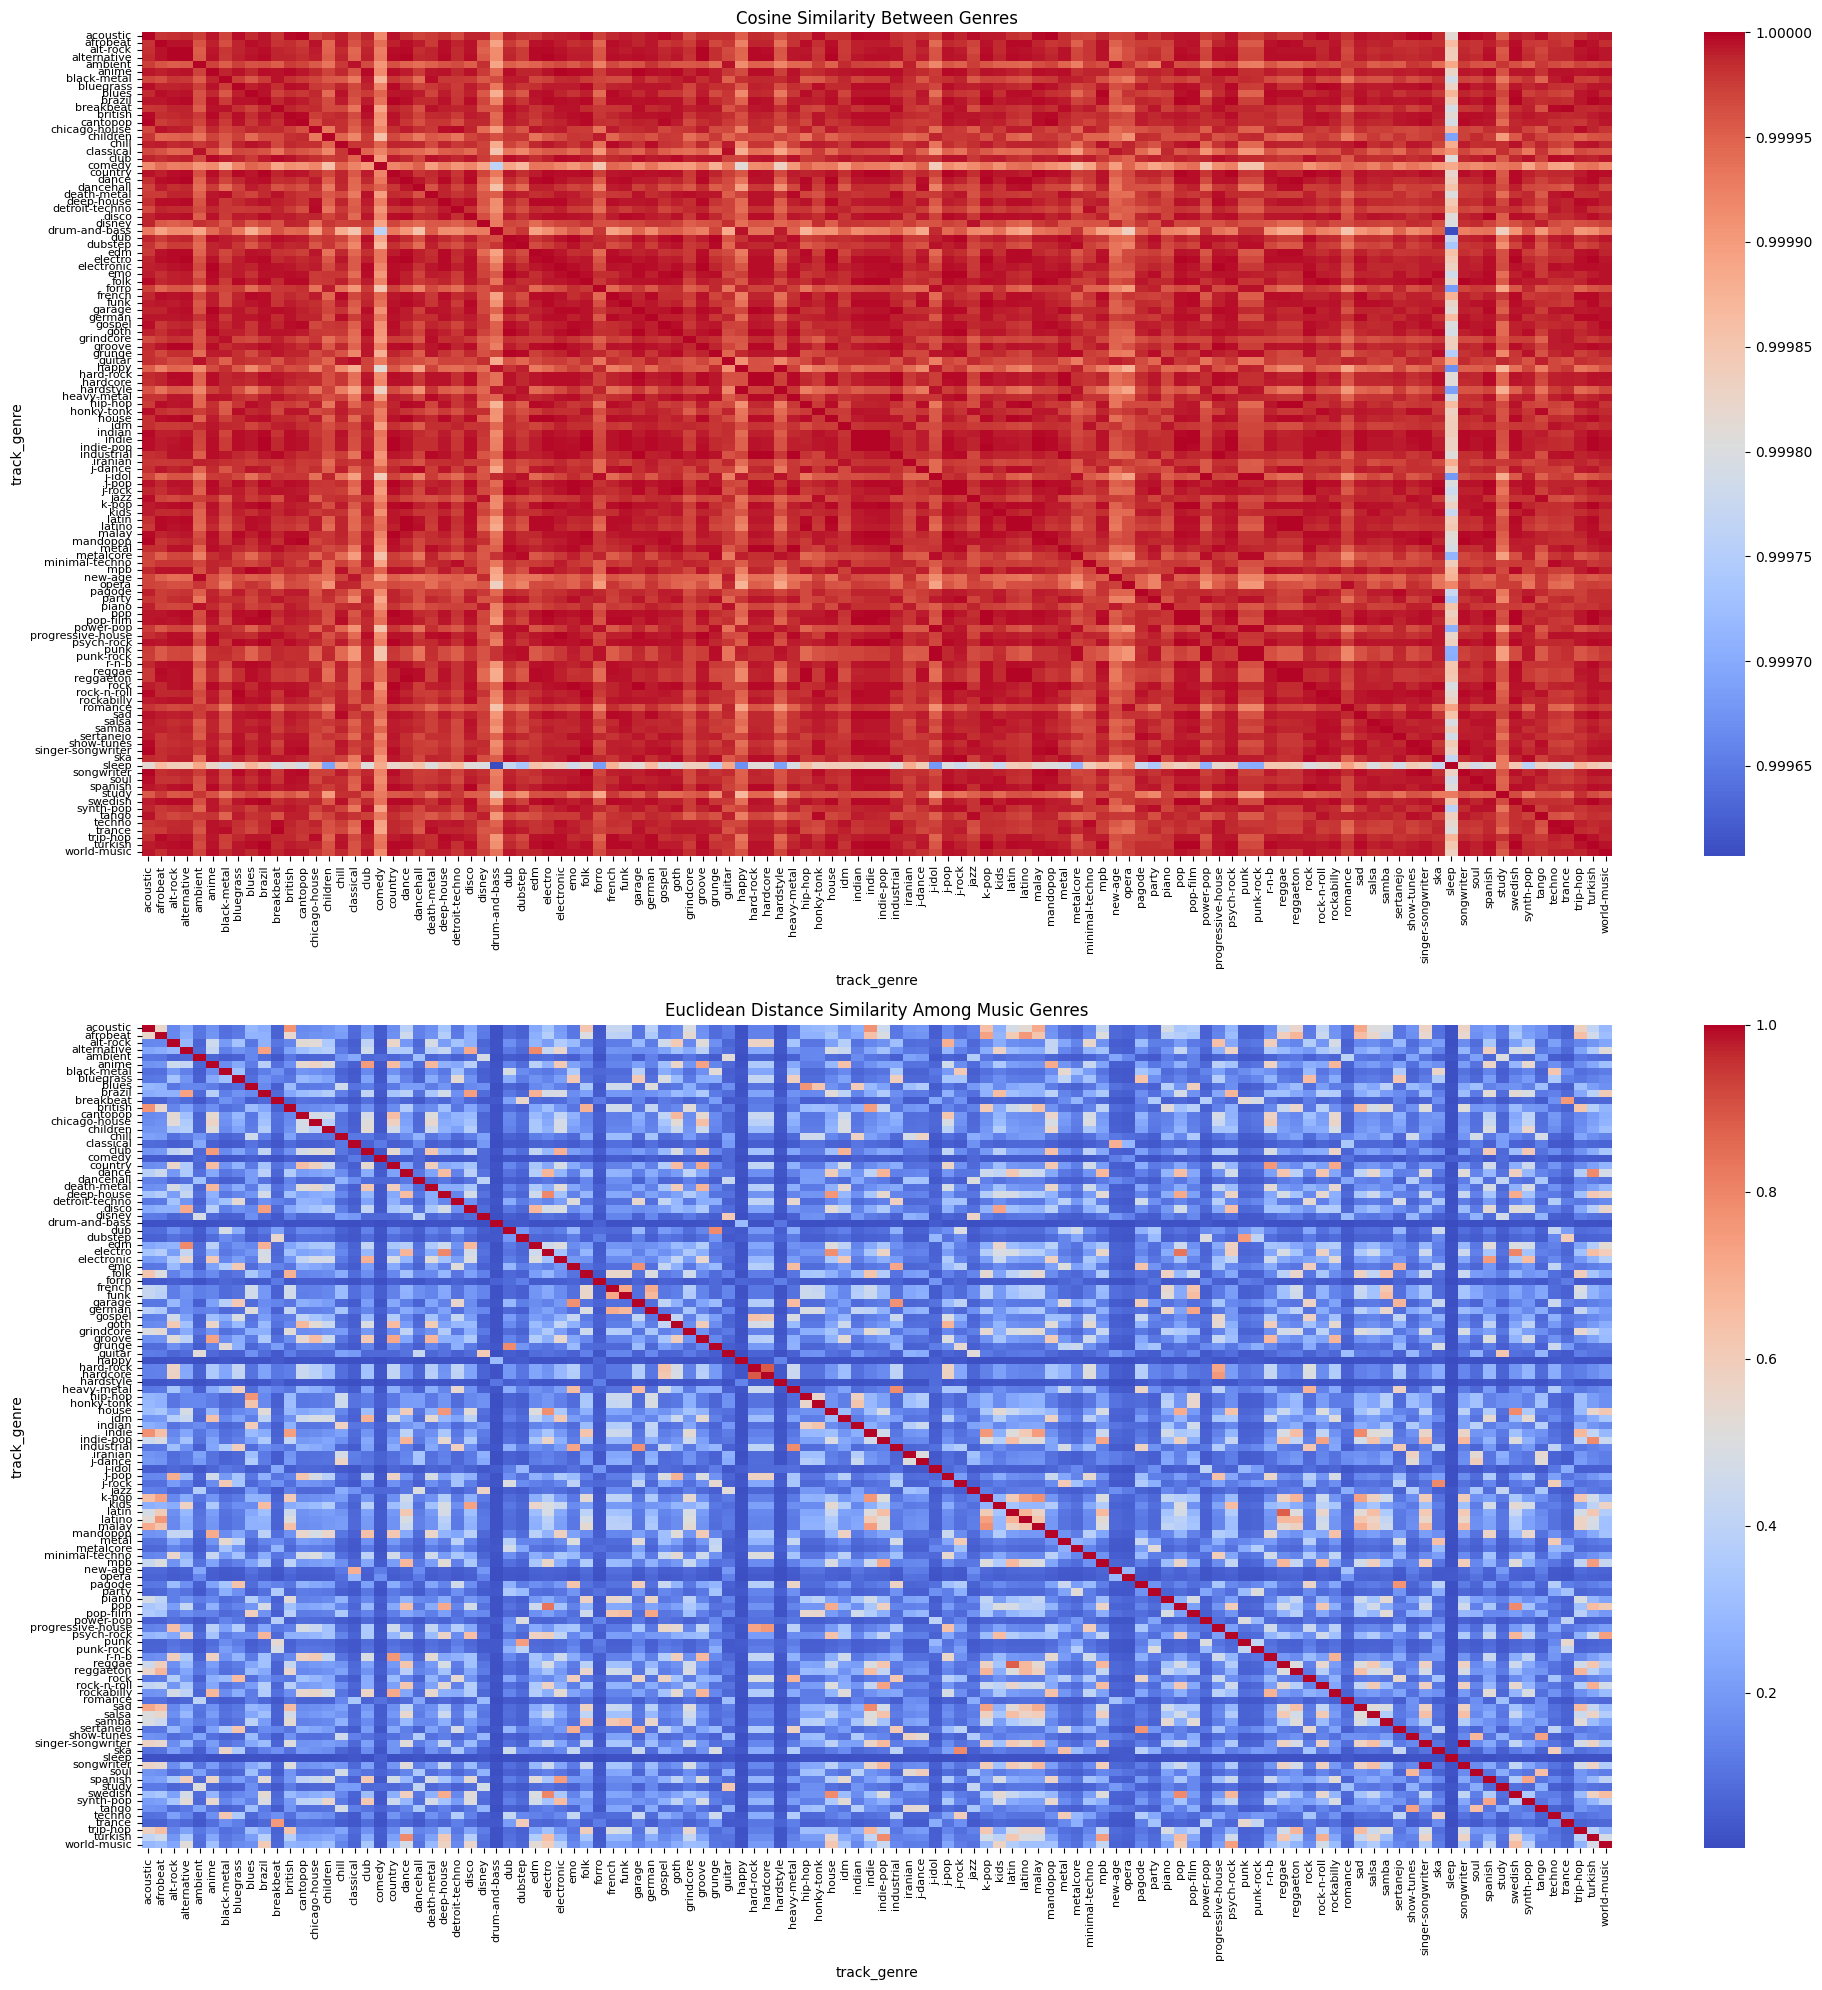

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances
import plotly.express as px

# Compute pairwise cosine similarity
feature_matrix = average_df.iloc[:, 1:]  # Exclude genre column

#### Cosine similarity ####
similarity_matrix = cosine_similarity(feature_matrix)
cos_sim_df = pd.DataFrame(similarity_matrix, index=average_df.index, columns=average_df.index)

#### Euclidean Distance similarity ####
euclidean_distances = pairwise_distances(feature_matrix, metric='euclidean')
# Convert distances into similarities
# Using similarity = 1 / (1 + distance)
euclidean_similarity = 1 / (1 + euclidean_distances)
euc_sim_df = pd.DataFrame(euclidean_similarity, index=average_df.index, columns=average_df.index)

# Visualize the similarity matrix
fig, axes = plt.subplots(2, 1, figsize=(20, 20))

sns.heatmap(cos_sim_df, cmap='coolwarm', annot=False, xticklabels=True, yticklabels=True, ax=axes[0])
axes[0].set_title("Cosine Similarity Between Genres")
axes[0].tick_params(axis='x', labelsize=8)
axes[0].tick_params(axis='y', labelsize=8)

sns.heatmap(euc_sim_df, cmap='coolwarm', annot=False, xticklabels=True, yticklabels=True, ax=axes[1])
axes[1].set_title('Euclidean Distance Similarity Among Music Genres')
axes[1].tick_params(axis='x', labelsize=8)
axes[1].tick_params(axis='y', labelsize=8)

# fig = px.imshow(cos_sim_df, labels=dict(x="Genre", y="Genre", color="Cosine Similarity"))
# fig.update_layout(width=1000, height=1000)
# fig.show()

plt.tight_layout()
plt.show()

##Dataset Plot

In [ ]:
# from matplotlib.colors import ListedColormap
# # Create a custom color palette
# custom_palette = sns.color_palette("husl", n_colors=df['track_genre'].nunique())

# # Create the plot
# g = sns.FacetGrid(df, hue="track_genre", height=10, aspect=1.5, palette=custom_palette, legend_out=True)
# g.map_dataframe(sns.scatterplot, x="loudness", y="acousticness").add_legend(title="Track Genre", ncol=3,)

# Data Preprocessing


## Encoding


### Not int Values
Map the boolean values of the 'explicit' feature into integers:\
true = 1\
false = 0


In [ ]:
print(df['explicit'].unique())
# Map the explicit column to binary values
df['explicit'] = df['explicit'].map({False: 0,True: 1})
print(df['explicit'].unique())

[False  True]
[0 1]


### One-hot Encoding


In [ ]:
from sklearn import preprocessing

encoder = preprocessing.OneHotEncoder(sparse_output=False)

### Encoding the keys ###
key_one_hot_labels = encoder.fit_transform(df[['key']])
key_one_hot_df = pd.DataFrame(key_one_hot_labels, columns=encoder.get_feature_names_out(['key']))

### Encoding the time_signature ###
time_signature_one_hot_labels = encoder.fit_transform(df[['time_signature']])
time_signature_one_hot_df = pd.DataFrame(time_signature_one_hot_labels, columns=encoder.get_feature_names_out(['time_signature']))

one_hot_encoded_table = pd.concat([key_one_hot_df, time_signature_one_hot_df], axis=1)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust the display width
print(one_hot_encoded_table)

        key_0  key_1  key_2  key_3  key_4  key_5  key_6  key_7  key_8  key_9  key_10  key_11  \
0         0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   
1         0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   
2         1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   
3         1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   
4         0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...     ...     ...   
113544    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0     0.0     0.0   
113545    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   
113546    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   
113547    0.0    0.0    0.0    0.0    0.

In [ ]:
print(df.index)
print(key_one_hot_df.index)
print(time_signature_one_hot_df.index)

df = df.reset_index(drop=True)
print(df.index)

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,      9,
       ...
       113990, 113991, 113992, 113993, 113994, 113995, 113996, 113997, 113998, 113999],
      dtype='int64', length=113549)
RangeIndex(start=0, stop=113549, step=1)
RangeIndex(start=0, stop=113549, step=1)
RangeIndex(start=0, stop=113549, step=1)


In [ ]:
df=df.drop(columns=['key','time_signature'])
df = pd.concat([df, key_one_hot_df, time_signature_one_hot_df], axis=1)
df

track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113544  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113545  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113546  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113547  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113548  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name                  track_name  popularity  \
0                                                  Comedy                      Comedy          73   
1                                        Ghost (Acoustic)            Ghost - Acoustic          55   
2                                          To Begin Again              To Begin Again          57   
3       Crazy Rich Asians (Original Motion Picture Sou...  Can't Help Falling In Love          71   
4                                                 Hold On                     Hold On          82   
...                                                   ...                         ...         ...   
113544  #mindfulness - Soft Rain for Mindful Meditatio...         Sleep My Little Boy          21   
113545  #mindfulness - Soft Rain for Mindful Meditatio...            Water Into Light          22   
113546                                            Best Of              Miss Perfumado          22   
113547                                  Change Your World                     Friends          41   
113548                                     Miss Perfumado                   Barbincor          22   

        duration_ms  explicit  danceability  energy  loudness  mode  speechiness  acousticness  \
0            230666         0         0.676  0.4610    -6.746     0       0.1430        0.0322   
1            149610         0         0.420  0.1660   -17.235     1       0.0763        0.9240   
2            210826         0         0.438  0.3590    -9.734     1       0.0557        0.2100   
3            201933         0         0.266  0.0596   -18.515     1       0.0363        0.9050   
4            198853         0         0.618  0.4430    -9.681     1       0.0526        0.4690   
...             ...       ...           ...     ...       ...   ...          ...           ...   
113544       384999         0         0.172  0.2350   -16.393     1       0.0422        0.6400   
113545       385000         0         0.174  0.1170   -18.318     0       0.0401        0.9940   
113546       271466         0         0.629  0.3290   -10.895     0       0.0420        0.8670   
113547       283893         0         0.587  0.5060   -10.889     1       0.0297        0.3810   
113548       241826         0         0.526  0.4870   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  track_genre  key_0  key_1  key_2  key_3  \
0               0.000001    0.3580   0.7150   87.917     acoustic    0.0    1.0    0.0    0.0   
1               0.000006    0.1010   0.2670   77.489     acoustic    0.0    1.0    0.0    0.0   
2               0.000000    0.1170   0.1200   76.332     acoustic    1.0    0.0    0.0    0.0   
3               0.000071    0.1320   0.1430  181.740     acoustic    1.0    0.0    0.0    0.0   
4               0.000000    0.0829   0.1670  119.949     acoustic    0.0    0.0    1.0    0.0   
...                  ...       ...      ...      ...          ...    ...    ...    ...    ...   
113544          0.928000    0.0863   0.0339  125.995  world-music    0.0    0.0    0.0    0.0   
113545          0.976000    0.1050   0.0350   85.239  world-music    1.0    0.0    0.0    0.0   
113546          0.000000    0.0839   0.7430  132.378  world-mu

## Feature Scaling
Scaling non categorical variables, just the numerical one:

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ["popularity","duration_ms","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]

# Scale the entire dataset for clustering
scaler = StandardScaler()
df_scaled = df.copy()

# Fit the scaler to the numerical columns of df_scaled and transform the data
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

In [ ]:
df.info()
df[numerical_columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113549 entries, 0 to 113548
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  int64  
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   loudness          113549 non-null  float64
 10  mode              113549 non-null  int64  
 11  speechiness       113549 non-null  float64
 12  acousticness      113549 non-null  float64
 13  instrumentalness  113549 non-null  float64
 14  liveness          113549 non-null  float64
 15  valence           113549 non-null  float64
 16  tempo             11

popularity  duration_ms  danceability  energy  loudness  speechiness  acousticness  \
0               73       230666         0.676  0.4610    -6.746       0.1430        0.0322   
1               55       149610         0.420  0.1660   -17.235       0.0763        0.9240   
2               57       210826         0.438  0.3590    -9.734       0.0557        0.2100   
3               71       201933         0.266  0.0596   -18.515       0.0363        0.9050   
4               82       198853         0.618  0.4430    -9.681       0.0526        0.4690   
...            ...          ...           ...     ...       ...          ...           ...   
113544          21       384999         0.172  0.2350   -16.393       0.0422        0.6400   
113545          22       385000         0.174  0.1170   -18.318       0.0401        0.9940   
113546          22       271466         0.629  0.3290   -10.895       0.0420        0.8670   
113547          41       283893         0.587  0.5060   -10.889       0.0297        0.3810   
113548          22       241826         0.526  0.4870   -10.204       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  
0               0.000001    0.3580   0.7150   87.917  
1               0.000006    0.1010   0.2670   77.489  
2               0.000000    0.1170   0.1200   76.332  
3               0.000071    0.1320   0.1430  181.740  
4               0.000000    0.0829   0.1670  119.949  
...                  ...       ...      ...      ...  
113544          0.928000    0.0863   0.0339  125.995  
113545          0.976000    0.1050   0.0350   85.239  
113546          0.000000    0.0839   0.7430  132.378  
113547          0.000000    0.2700   0.4130  135.960  
113548          0.000000    0.0893   0.7080   79.198  

[113549 rows x 11 columns]

In [ ]:
df_scaled.info()
df_scaled[numerical_columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113549 entries, 0 to 113548
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  float64
 5   duration_ms       113549 non-null  float64
 6   explicit          113549 non-null  int64  
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   loudness          113549 non-null  float64
 10  mode              113549 non-null  int64  
 11  speechiness       113549 non-null  float64
 12  acousticness      113549 non-null  float64
 13  instrumentalness  113549 non-null  float64
 14  liveness          113549 non-null  float64
 15  valence           113549 non-null  float64
 16  tempo             11

popularity  duration_ms  danceability    energy  loudness  speechiness  acousticness  \
0         1.780470     0.024289      0.628394 -0.721328  0.298800     0.551483     -0.849230   
1         0.972707    -0.737425     -0.847891 -1.896382 -1.794228    -0.079182      1.837684   
2         1.062459    -0.162155     -0.744089 -1.127618 -0.297440    -0.273960     -0.313535   
3         1.690719    -0.245726     -1.735968 -2.320198 -2.049645    -0.457392      1.780439   
4         2.184352    -0.274670      0.293923 -0.793026 -0.286864    -0.303272      0.466809   
...            ...          ...           ...       ...       ...          ...           ...   
113544   -0.553068     1.474615     -2.278041 -1.621539 -1.626211    -0.401606      0.982017   
113545   -0.508192     1.474624     -2.266507 -2.091561 -2.010335    -0.421462      2.048588   
113546   -0.508192     0.407702      0.357357 -1.247115 -0.529112    -0.403497      1.665948   
113547    0.344447     0.524483      0.115154 -0.542082 -0.527915    -0.519797      0.201673   
113548   -0.508192     0.129164     -0.236617 -0.617763 -0.391226    -0.115112      1.105546   

        instrumentalness  liveness   valence     tempo  
0              -0.503538  0.758094  0.928984 -1.142994  
1              -0.503524 -0.591264 -0.799395 -1.490909  
2              -0.503542 -0.507257 -1.366520 -1.529510  
3              -0.503313 -0.428501 -1.277786  1.987275  
4              -0.503542 -0.686296 -1.185194 -0.074292  
...                  ...       ...       ...       ...  
113544          2.497600 -0.668445 -1.698692  0.127424  
113545          2.652832 -0.570262 -1.694449 -1.232341  
113546         -0.503542 -0.681046  1.037007  0.340384  
113547         -0.503542  0.296057 -0.236129  0.459892  
113548         -0.503542 -0.652694  0.901978 -1.433890  

[113549 rows x 11 columns]

# Feature Selection


Per prima cosa rimuoviamo tutte le righe del DataFrame relative ai generi 'british', 'french', 'german', 'swedish', 'spanish', 'indian', 'malay', 'turkish', 'world-music' e 'gospel', perché queste classificazioni si basano sull'origine o sulla lingua, che non sono catturate dalle caratteristiche audio del dataset.

In [ ]:
non_sound_based_categories = ['british','french','german','swedish','spanish','indian','malay','turkish','world-music','gospel']

def drop_useless_features (df_tmp):
  df_tmp = df_tmp.drop(df_tmp[df_tmp['track_genre'].isin(non_sound_based_categories)].index)
  df_tmp = df_tmp.drop(columns = ['track_id','artists','album_name','track_name'])
  return df_tmp

df = drop_useless_features(df)
df_scaled = drop_useless_features(df_scaled)

df.info()
df['track_genre'].unique()

df_scaled.info()
df_scaled['track_genre'].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 103592 entries, 0 to 111550
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        103592 non-null  int64  
 1   duration_ms       103592 non-null  int64  
 2   explicit          103592 non-null  int64  
 3   danceability      103592 non-null  float64
 4   energy            103592 non-null  float64
 5   loudness          103592 non-null  float64
 6   mode              103592 non-null  int64  
 7   speechiness       103592 non-null  float64
 8   acousticness      103592 non-null  float64
 9   instrumentalness  103592 non-null  float64
 10  liveness          103592 non-null  float64
 11  valence           103592 non-null  float64
 12  tempo             103592 non-null  float64
 13  track_genre       103592 non-null  object 
 14  key_0             103592 non-null  float64
 15  key_1             103592 non-null  float64
 16  key_2             103592 

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'cantopop', 'chicago-house', 'children', 'chill',
       'classical', 'club', 'comedy', 'country', 'dance', 'dancehall',
       'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney',
       'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic',
       'emo', 'folk', 'forro', 'funk', 'garage', 'goth', 'grindcore',
       'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore',
       'hardstyle', 'heavy-metal', 'hip-hop', 'honky-tonk', 'house',
       'idm', 'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance',
       'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin',
       'latino', 'mandopop', 'metal', 'metalcore', 'minimal-techno',
       'mpb', 'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film',
       'pop', 'power-pop', 'progressive-house', 'psych-rock', 'punk-rock',
       'pu

## Regroup similar track genres

To reduce the number of track genres in the DataFrame it is possible to group to each other similar track genres.
We can compute the mean of each row and group by genre and plot the similarities by using the Dendogram.

In [ ]:
import scipy.cluster.hierarchy as sch

# Group by genre
genres_average = df_scaled.groupby('track_genre').mean()

# Display the feature means for each genre
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust the display width
print(genres_average)

             popularity  duration_ms  explicit  danceability    energy  loudness      mode  \
track_genre                                                                                  
acoustic       0.410997    -0.123899  0.052000     -0.100562 -0.823425 -0.240339  0.816000   
afrobeat      -0.400158     0.191336  0.018018      0.590382  0.242368  0.090555  0.510511   
alt-rock       0.025690     0.068368  0.056056     -0.187019  0.445868  0.408947  0.640641   
alternative   -0.402224    -0.056833  0.164164     -0.040761  0.309724  0.432457  0.605606   
ambient        0.488417     0.086166  0.005005     -1.147958 -1.612549 -2.065862  0.619620   
...                 ...          ...       ...           ...       ...       ...       ...   
synth-pop      0.145916     0.157167  0.044000      0.309280  0.282985  0.007736  0.612000   
tango         -0.603733    -0.424887  0.000000     -0.168212 -1.072537 -0.362963  0.480000   
techno         0.256580     0.791542  0.026000      0.676534

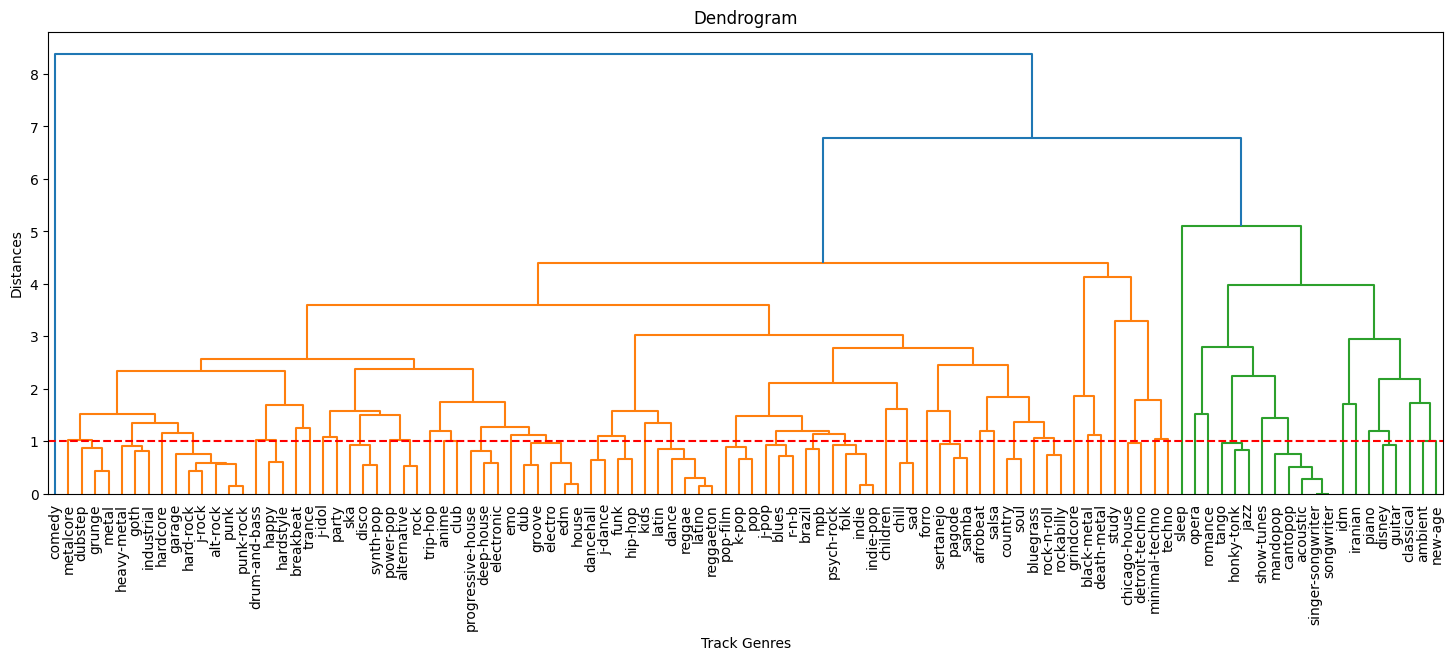

In [ ]:
# Perform hierarchical clustering
plt.figure(figsize=(18, 6))
dendrogram = sch.dendrogram(sch.linkage(genres_average, method='complete'), labels=genres_average.index)

# Show the dendrogram
plt.title('Dendrogram')
plt.xlabel('Track Genres')
plt.ylabel('Distances')

# Increase the size of x-labels
plt.tick_params(axis='x', labelsize=10)

# Add a horizontal line at distance = 1
plt.axhline(y=1, color='r', linestyle='--')

# Show the plot
plt.show()

Imposing a threshold equal to 1 it is possible to group all the genres in clusters below that value and similar to each other.

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Perform hierarchical clustering
linkage_matrix = sch.linkage(genres_average, method='complete')

# Specify the distance threshold
threshold = 1

# Extract the cluster labels based on the threshold
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Add cluster labels to the original DataFrame
genres_average['Cluster'] = clusters

# Set the maximum number of rows to display
pd.set_option('display.max_rows', 60)

# Create a dictionary to store classes and clusters
cluster_dict = {}
for i, (cluster, category) in enumerate(zip(clusters, genres_average.index)):
    if cluster not in cluster_dict:
        cluster_dict[cluster] = []
    cluster_dict[cluster].append(category)

ordered_cluster_dict = dict(sorted(cluster_dict.items()))

ordered_cluster_dict

{1: ['dubstep', 'grunge', 'metal'],
 2: ['metalcore'],
 3: ['goth', 'heavy-metal', 'industrial'],
 4: ['alt-rock', 'garage', 'hard-rock', 'j-rock', 'punk', 'punk-rock'],
 5: ['hardcore'],
 6: ['happy', 'hardstyle'],
 7: ['drum-and-bass'],
 8: ['breakbeat'],
 9: ['trance'],
 10: ['j-idol'],
 11: ['party'],
 12: ['disco', 'ska', 'synth-pop'],
 13: ['alternative', 'rock'],
 14: ['power-pop'],
 15: ['anime', 'club'],
 16: ['trip-hop'],
 17: ['deep-house', 'electronic', 'progressive-house'],
 18: ['dub', 'edm', 'electro', 'groove', 'house'],
 19: ['emo'],
 20: ['dancehall', 'j-dance'],
 21: ['funk', 'hip-hop'],
 22: ['dance', 'latin', 'latino', 'reggae', 'reggaeton'],
 23: ['kids'],
 24: ['k-pop', 'pop', 'pop-film'],
 25: ['blues', 'j-pop', 'r-n-b'],
 26: ['brazil', 'mpb'],
 27: ['folk', 'indie', 'indie-pop', 'psych-rock'],
 28: ['chill', 'sad'],
 29: ['children'],
 30: ['pagode', 'samba', 'sertanejo'],
 31: ['forro'],
 32: ['afrobeat'],
 33: ['salsa'],
 34: ['country', 'soul'],
 35: ['rock

In [ ]:
# Dictionary with descriptive names

consolidated_genres = {'agressive-fusion': ['dubstep', 'grunge', 'metal'],
                       'industrial': ['goth', 'heavy-metal', 'industrial'],
                       'punk-rock': ['alt-rock', 'garage', 'hard-rock', 'j-rock', 'punk', 'punk-rock'],
                       'hardstyle': ['happy', 'hardstyle'],
                       'disco-ska': ['disco', 'ska', 'synth-pop'],
                       'rock': ['alternative', 'rock'],
                       'anime': ['anime', 'club'],
                       'edm-house': ['deep-house', 'electronic', 'progressive-house'],
                       'edm': ['dub', 'edm', 'electro', 'groove', 'house'],
                       'j-dance': ['dancehall', 'j-dance'],
                       'funk-hip-hop': ['funk', 'hip-hop'],
                       'latin': ['dance', 'latin', 'latino', 'reggae', 'reggaeton'],
                       'pop': ['k-pop', 'pop', 'pop-film'],
                       'brazilian': ['brazil', 'mpb'],
                       'blues-rnb': ['blues', 'j-pop', 'r-n-b'],
                       'indie': ['folk', 'indie', 'indie-pop', 'psych-rock'],
                       'chill': ['chill', 'sad'],
                       'pagode-samba': ['pagode', 'samba', 'sertanejo'],
                       'country-soul': ['country', 'soul'],
                       'rock-n-roll': ['rock-n-roll', 'rockabilly'],
                       'chicago-house': ['chicago-house', 'detroit-techno'],
                       'jazz-tango': ['honky-tonk', 'jazz', 'tango'],
                       'vocal-pop': ['acoustic', 'cantopop', 'mandopop', 'singer-songwriter', 'songwriter'],
                       'disney': ['disney', 'guitar'],
                       'soundscape': ['ambient', 'new-age']}

# Create a dictionary to map old genres to new genres
genre_map = {old_genre: new_genre for new_genre, old_genres in consolidated_genres.items() for old_genre in old_genres}

# Replace the old genres with the new genres
df['track_genre'] = df['track_genre'].replace(genre_map)

track_genre
punk-rock           5996
vocal-pop           4999
edm                 4987
latin               4948
indie               3992
pagode-samba        3000
disco-ska           3000
industrial          2997
edm-house           2997
blues-rnb           2996
agressive-fusion    2996
pop                 2990
jazz-tango          2980
chill               1999
country-soul        1999
rock                1999
rock-n-roll         1999
brazilian           1998
disney              1998
hardstyle           1997
chicago-house       1996
anime               1994
soundscape          1993
j-dance             1992
funk-hip-hop        1991
techno              1000
emo                 1000
sleep               1000
metalcore           1000
hardcore             999
j-idol               999
trance               999
afrobeat             999
breakbeat            999
death-metal          999
show-tunes           999
salsa                998
piano                998
study                998
minimal-techn

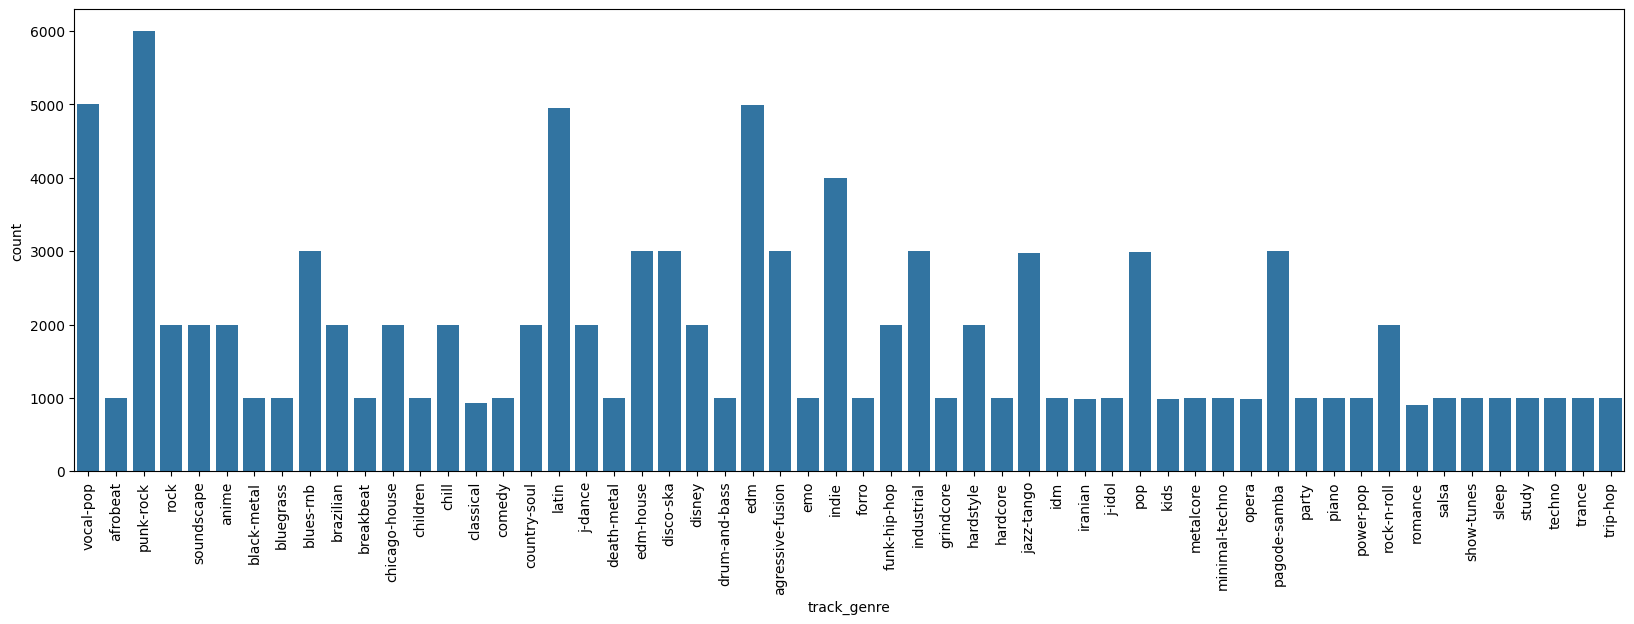

In [ ]:
print(df['track_genre'].value_counts())
plt.figure(figsize=(20, 6))
sns.countplot(x='track_genre', data=df)
plt.xticks(rotation=90)
plt.show()

Due to the reduction of the music genres in similar groups, the dataset is now imbalaced.

We use the SMOTE technique to balance the dataframe before splitting it.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

X = df.drop("track_genre", axis=1)
y = df["track_genre"].values

# Check if there are no non-numeic colummns in the DataFrame before using SMOTE for sampling
print("Non-numeric columns in track_genre:")
print(X.select_dtypes(include=['object', 'category']).columns.tolist())

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Because the dataset is now imbalanced, we need to resample training data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['track_genre'] = y_resampled  # Add back the genre column

df = df_resampled.copy()

Non-numeric columns in track_genre:
[]


track_genre
55    5996
0     5996
28    5996
23    5996
25    5996
24    5996
32    5996
26    5996
29    5996
31    5996
41    5996
33    5996
35    5996
36    5996
37    5996
38    5996
39    5996
40    5996
42    5996
45    5996
46    5996
47    5996
48    5996
49    5996
51    5996
52    5996
53    5996
22    5996
21    5996
27    5996
10    5996
43    5996
44    5996
50    5996
2     5996
3     5996
4     5996
5     5996
6     5996
7     5996
8     5996
9     5996
11    5996
20    5996
12    5996
13    5996
34    5996
30    5996
14    5996
19    5996
15    5996
16    5996
17    5996
18    5996
1     5996
54    5996
Name: count, dtype: int64


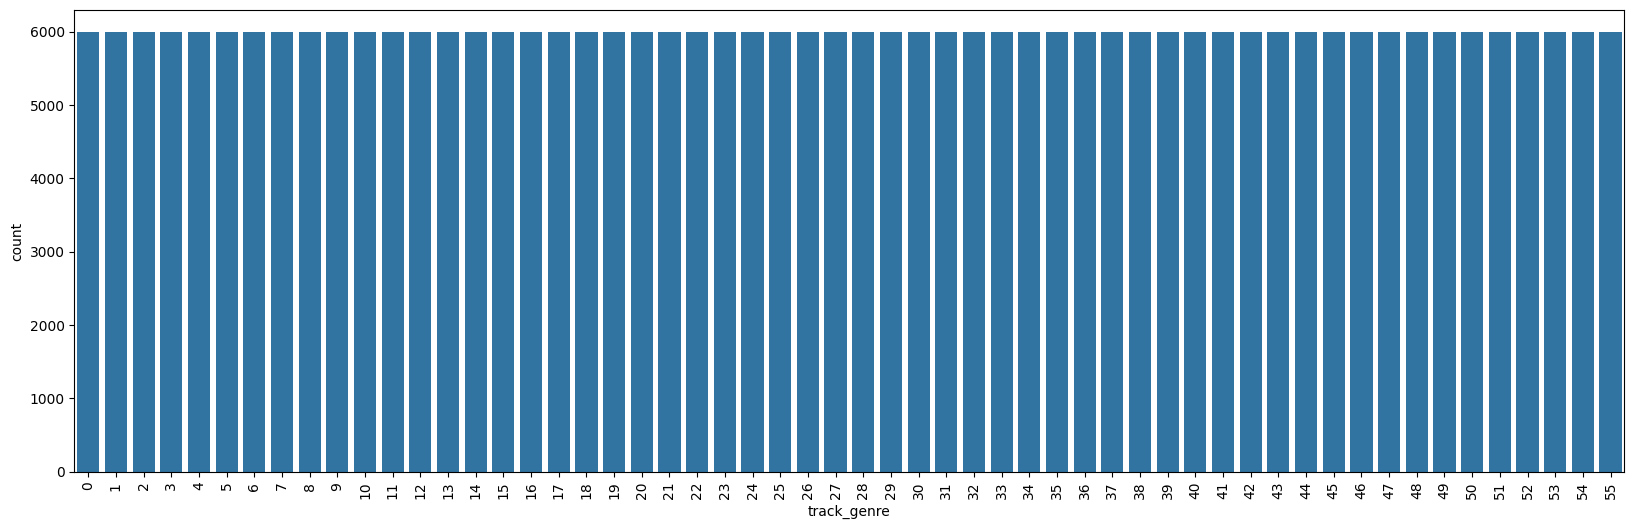

In [ ]:
print(df['track_genre'].value_counts())
plt.figure(figsize=(20, 6))
sns.countplot(x='track_genre', data=df)
plt.xticks(rotation=90)
plt.show()

# Split the Dataset

## Split into train, validation and test sets.

In [ ]:
df[numerical_columns]

popularity  duration_ms  danceability    energy   loudness  \
0               73       230666      0.676000  0.461000  -6.746000   
1               55       149610      0.420000  0.166000 -17.235000   
2               57       210826      0.438000  0.359000  -9.734000   
3               71       201933      0.266000  0.059600 -18.515000   
4               82       198853      0.618000  0.443000  -9.681000   
...            ...          ...           ...       ...        ...   
335771          49       273969      0.648927  0.423686  -9.041261   
335772          64       249104      0.677928  0.597447  -8.409718   
335773          34       211800      0.595000  0.209000 -12.693000   
335774           0       289693      0.634000  0.323000 -13.533000   
335775          46       225883      0.646649  0.408227 -11.622395   

        speechiness  acousticness  instrumentalness  liveness   valence  \
0          0.143000      0.032200      1.010000e-06  0.358000  0.715000   
1          0.076300      0.924000      5.560000e-06  0.101000  0.267000   
2          0.055700      0.210000      0.000000e+00  0.117000  0.120000   
3          0.036300      0.905000      7.070000e-05  0.132000  0.143000   
4          0.052600      0.469000      0.000000e+00  0.082900  0.167000   
...             ...           ...               ...       ...       ...   
335771     0.025578      0.531499      7.320833e-07  0.110684  0.616137   
335772     0.027261      0.158469      1.640409e-02  0.112611  0.439832   
335773     0.033000      0.912000      0.000000e+00  0.111000  0.347000   
335774     0.031800      0.830000      9.000000e-05  0.125000  0.488000   
335775     0.027907      0.883437      1.325611e-01  0.111701  0.324432   

             tempo  
0        87.917000  
1        77.489000  
2        76.332000  
3       181.740000  
4       119.949000  
...            ...  
335771  111.799349  
335772  105.142593  
335773  100.187000  
335774  147.943000  
335775  131.075394  

[335776 rows x 11 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the target and explanatory features
X = df.drop("track_genre", axis=1)
y = df["track_genre"].values

print(X)
print(y)

        popularity  duration_ms  explicit  danceability    energy   loudness  \
0               73       230666         0      0.676000  0.461000  -6.746000   
1               55       149610         0      0.420000  0.166000 -17.235000   
2               57       210826         0      0.438000  0.359000  -9.734000   
3               71       201933         0      0.266000  0.059600 -18.515000   
4               82       198853         0      0.618000  0.443000  -9.681000   
...            ...          ...       ...           ...       ...        ...   
335771          49       273969         0      0.648927  0.423686  -9.041261   
335772          64       249104         0      0.677928  0.597447  -8.409718   
335773          34       211800         0      0.595000  0.209000 -12.693000   
335774           0       289693         0      0.634000  0.323000 -13.533000   
335775          46       225883         0      0.646649  0.408227 -11.622395   

        mode  speechiness  acousticness

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
# Split train into train (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

## Scaling the data


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ["popularity","duration_ms","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]

print("Before scaling \n", X_train[numerical_columns])
print("Before scaling \n", X_val[numerical_columns])

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

print("After scaling \n", X_train[numerical_columns])
print("After scaling \n", X_val[numerical_columns])

Before scaling 
         popularity  duration_ms  danceability    energy   loudness  \
41036           29       188786      0.498000  0.293000  -9.507000   
196183          26       151023      0.770144  0.722551  -4.307915   
232772          20       265004      0.501726  0.912504  -2.940703   
63953           54       380800      0.551000  0.378000  -7.370000   
272074           0       215422      0.556958  0.240586 -22.347779   
...            ...          ...           ...       ...        ...   
231556          33       220926      0.658179  0.690634  -6.762565   
168789          27       136091      0.332393  0.921542  -8.603185   
302308          58       311205      0.485207  0.410500  -8.267207   
61920            2       161973      0.756000  0.800000  -3.673000   
62781            7       166253      0.647000  0.801000  -2.946000   

        speechiness  acousticness  instrumentalness  liveness   valence  \
41036      0.120000      0.838000          0.000000  0.142000  0.56

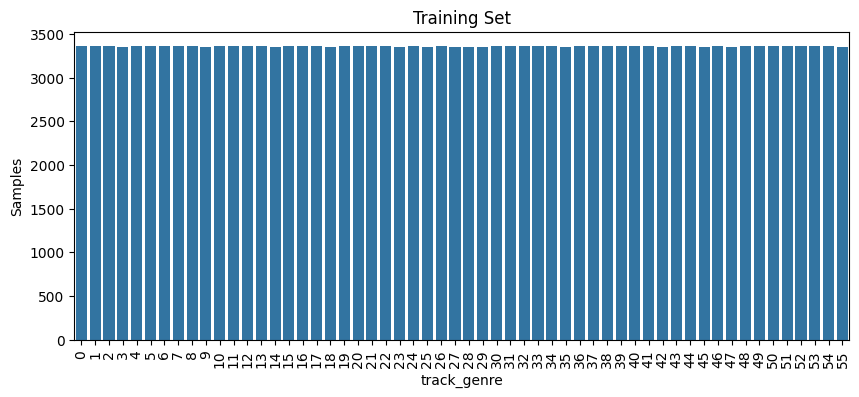

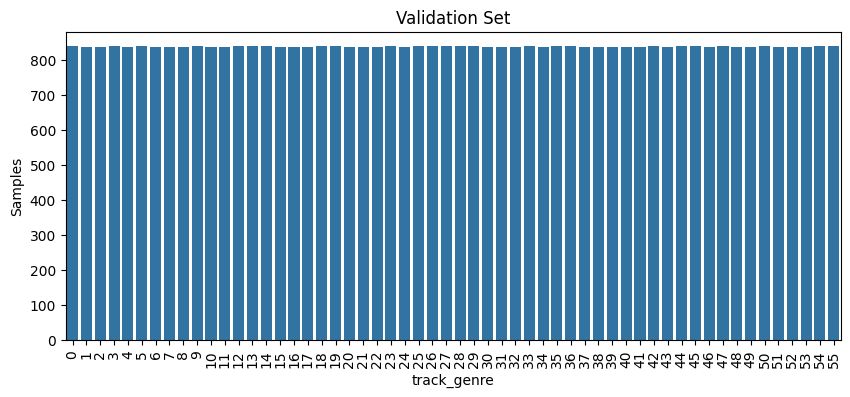

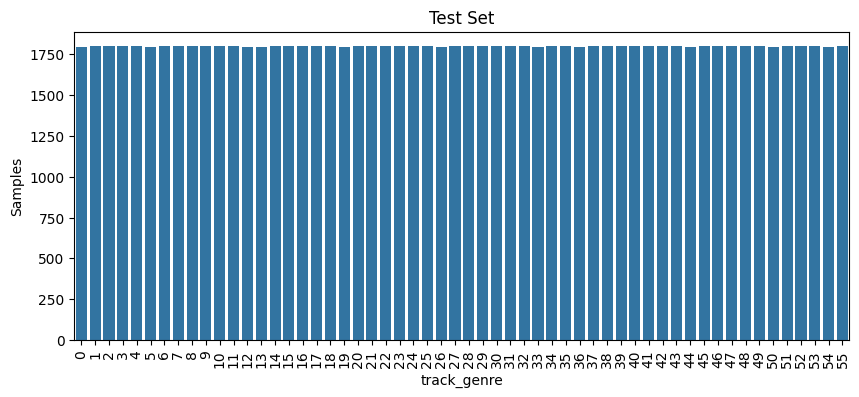

In [ ]:
def plot_class_distribution(y, title):
    plt.figure(figsize=(10, 4))
    sns.countplot(x=y, order=sorted(np.unique(y)))
    plt.title(title)
    plt.xlabel('track_genre')
    plt.ylabel('Samples')
    plt.xticks(rotation=90)
    plt.show()

# Plot original training set (imbalanced)
plot_class_distribution(y_train, "Training Set")
plot_class_distribution(y_val, "Validation Set")
plot_class_distribution(y_test, "Test Set")

Because we used SMOTE before splitting the datframe, all the train, validation and test sets are balanced.


# Machine Learning Models


Tutti i modelli prevedono la probabilità che una canzone appartenga a ciascun genere, non solo a uno. Per questo motivo, sceglieremo come metrica top-k categorical accuracy, che considera un brano correttamente classificato se il suo vero genere è tra i primi 3 (k = 3) generi previsti.

## Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

k = 3

# Define the number of classes and input features
num_classes = len(label_encoder.classes_)
inputs = keras.Input(shape=(X_train.shape[1],))

# Build the layers
nn_model = keras.Sequential([
    inputs,
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')])

# Trying to define an early stopping condition that stops the training when validation loss stops improving
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                               patience=12,
                                               restore_best_weights=True)

# Define the accuracy metric
sparse_topK_categorical_accuracy = keras.metrics.SparseTopKCategoricalAccuracy(k = k)

# Compile the model
nn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                 loss='sparse_categorical_crossentropy',
                 metrics=[sparse_topK_categorical_accuracy])

# Train the model
history = nn_model.fit(X_train,
                       y_train,
                       epochs=250,
                       batch_size=128,
                       validation_data=(X_val, y_val),
                       callbacks=[early_stopping])

# Make predictions
y_pred_nn = nn_model.predict(X_test)

Epoch 1/250
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 2.7381 - sparse_top_k_categorical_accuracy: 0.4767 - val_loss: 2.0695 - val_sparse_top_k_categorical_accuracy: 0.6580
Epoch 2/250
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 2.0048 - sparse_top_k_categorical_accuracy: 0.6699 - val_loss: 1.9243 - val_sparse_top_k_categorical_accuracy: 0.6891
Epoch 3/250
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1.8879 - sparse_top_k_categorical_accuracy: 0.6979 - val_loss: 1.8742 - val_sparse_top_k_categorical_accuracy: 0.7008
Epoch 4/250
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 1.8214 - sparse_top_k_categorical_accuracy: 0.7117 - val_loss: 1.8061 - val_sparse_top_k_categorical_accuracy: 0.7144
Epoch 5/250
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.7677 - sparse_top_k_categorical_accuracy: 0.7237 - val_loss: 1.7752 - val_sparse_top_k_categorical_accuracy: 0.7214
Epoch 6/250
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 1.7346 - sparse_top_k_categorica

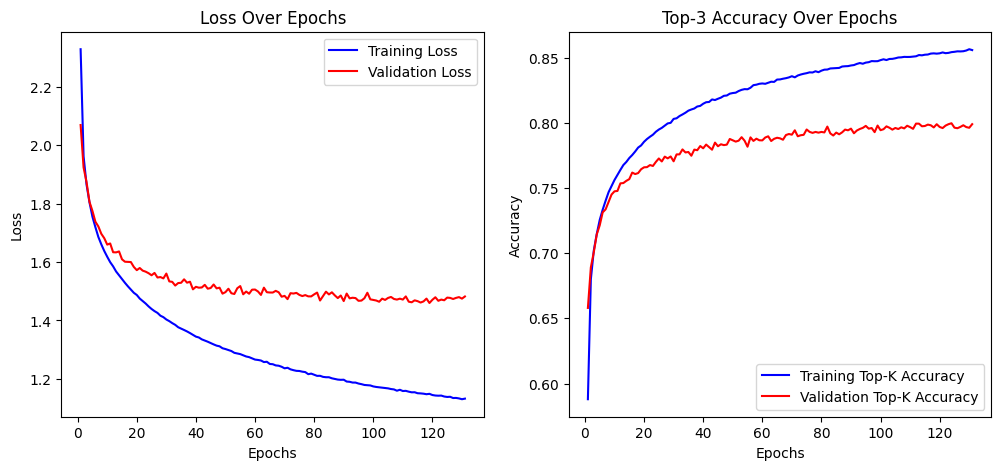

In [ ]:
# Plot training history
def plot_training_history(history):
    """Plots the loss and accuracy metrics for training and validation."""
    epochs = range(1, len(history.history['loss']) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Training Loss', color='blue')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['sparse_top_k_categorical_accuracy'], label='Training Top-K Accuracy', color='blue')
    plt.plot(epochs, history.history['val_sparse_top_k_categorical_accuracy'], label='Validation Top-K Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Top-{k} Accuracy Over Epochs')
    plt.legend()

    plt.show()

# Call the function to plot
plot_training_history(history)

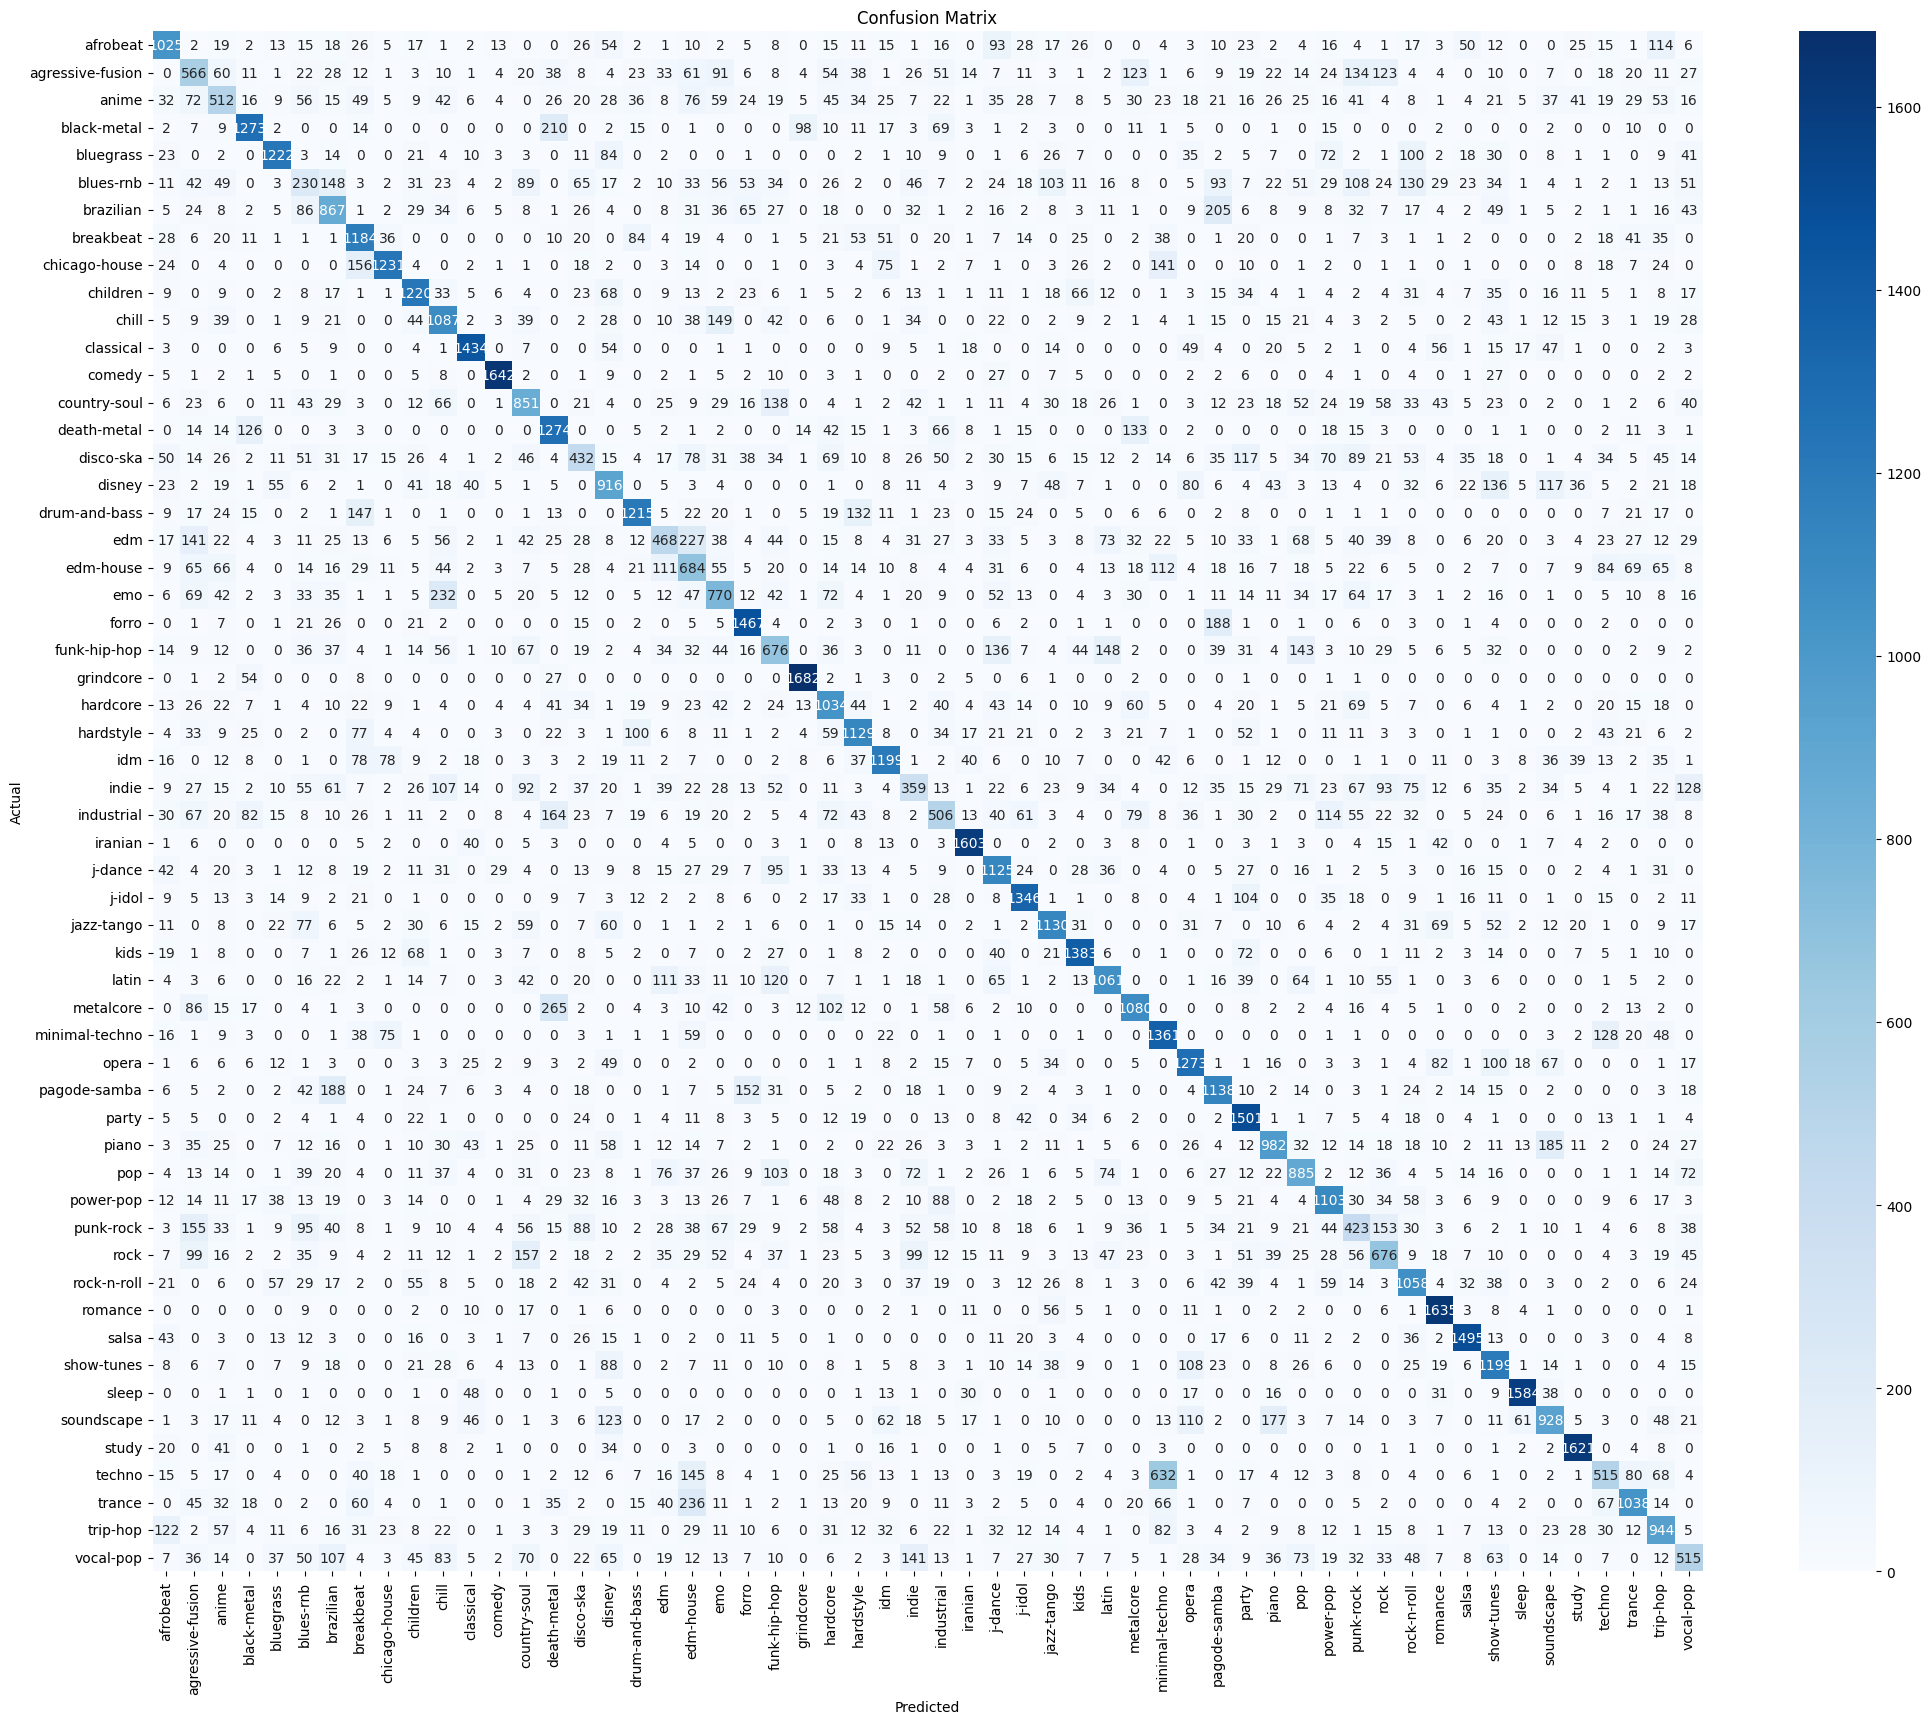

In [ ]:
# Convert probabilities to class indices (choosing the most probable class)
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)

from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nn_classes)

# Plot the confusion matrix
plt.figure(figsize=(25,20))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

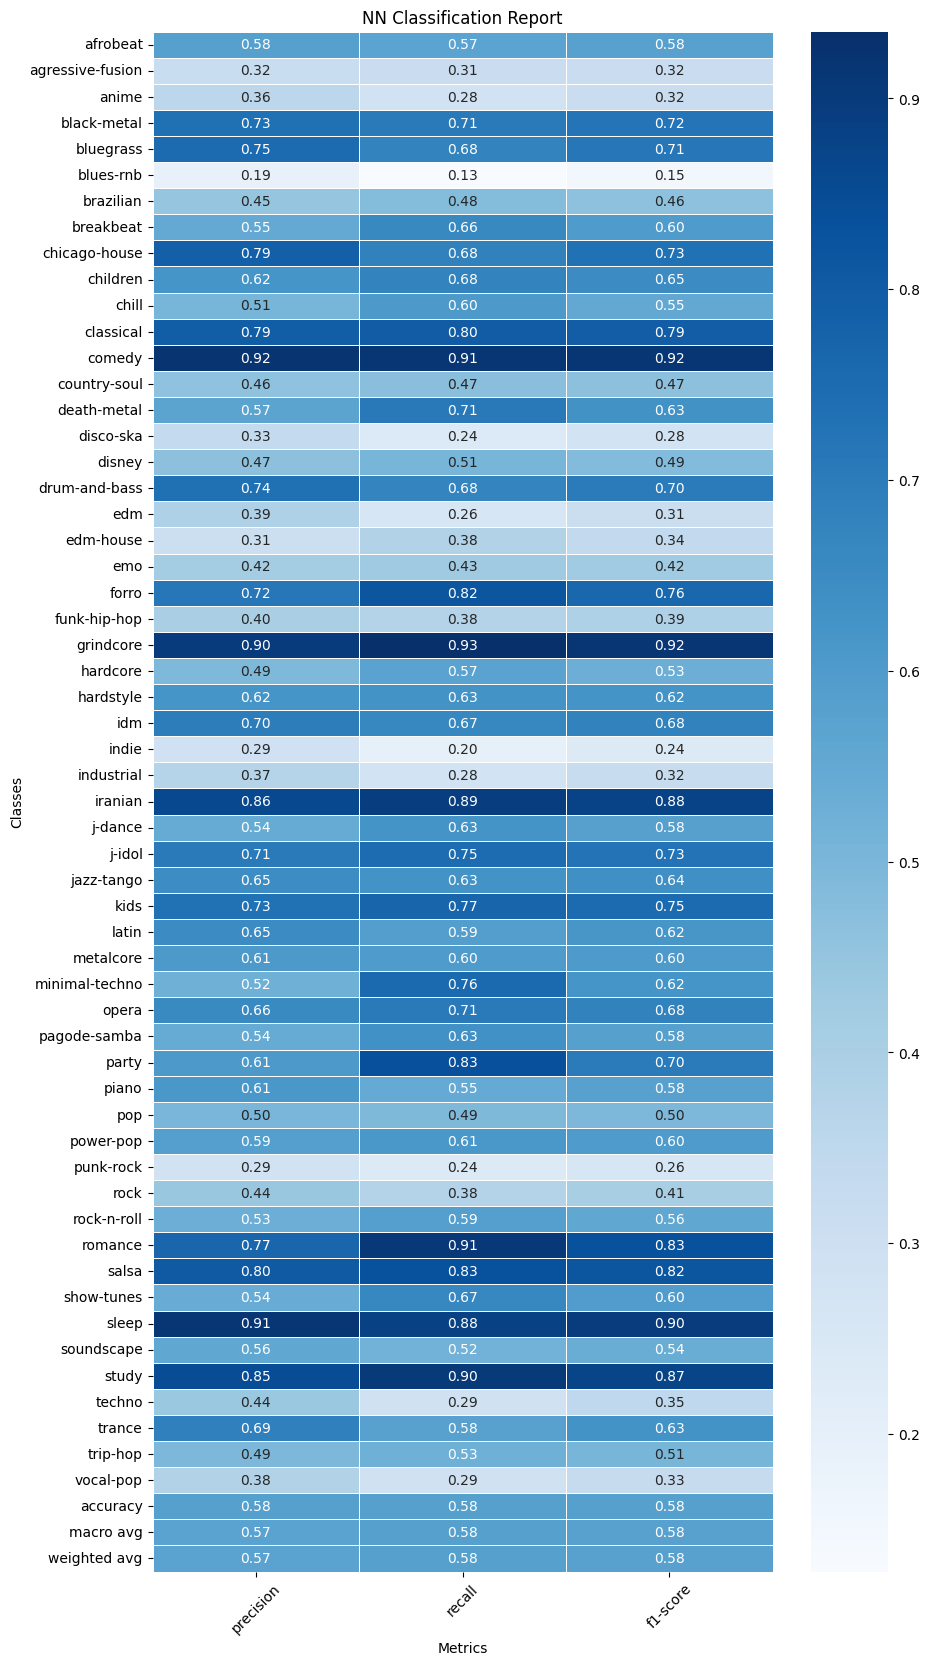

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
report_dict = classification_report(y_test, y_pred_nn_classes, target_names=label_encoder.classes_, output_dict=True)

# Convert dictionary to DataFrame (excluding support column)
report_df = pd.DataFrame(report_dict).T.drop(columns=['support'])

# Plot heatmap
plt.figure(figsize=(10, 20))
sns.heatmap(report_df, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title("NN Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

## KNN Model


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors = 10)

# Train the KNN classifier
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict_proba(X_test)

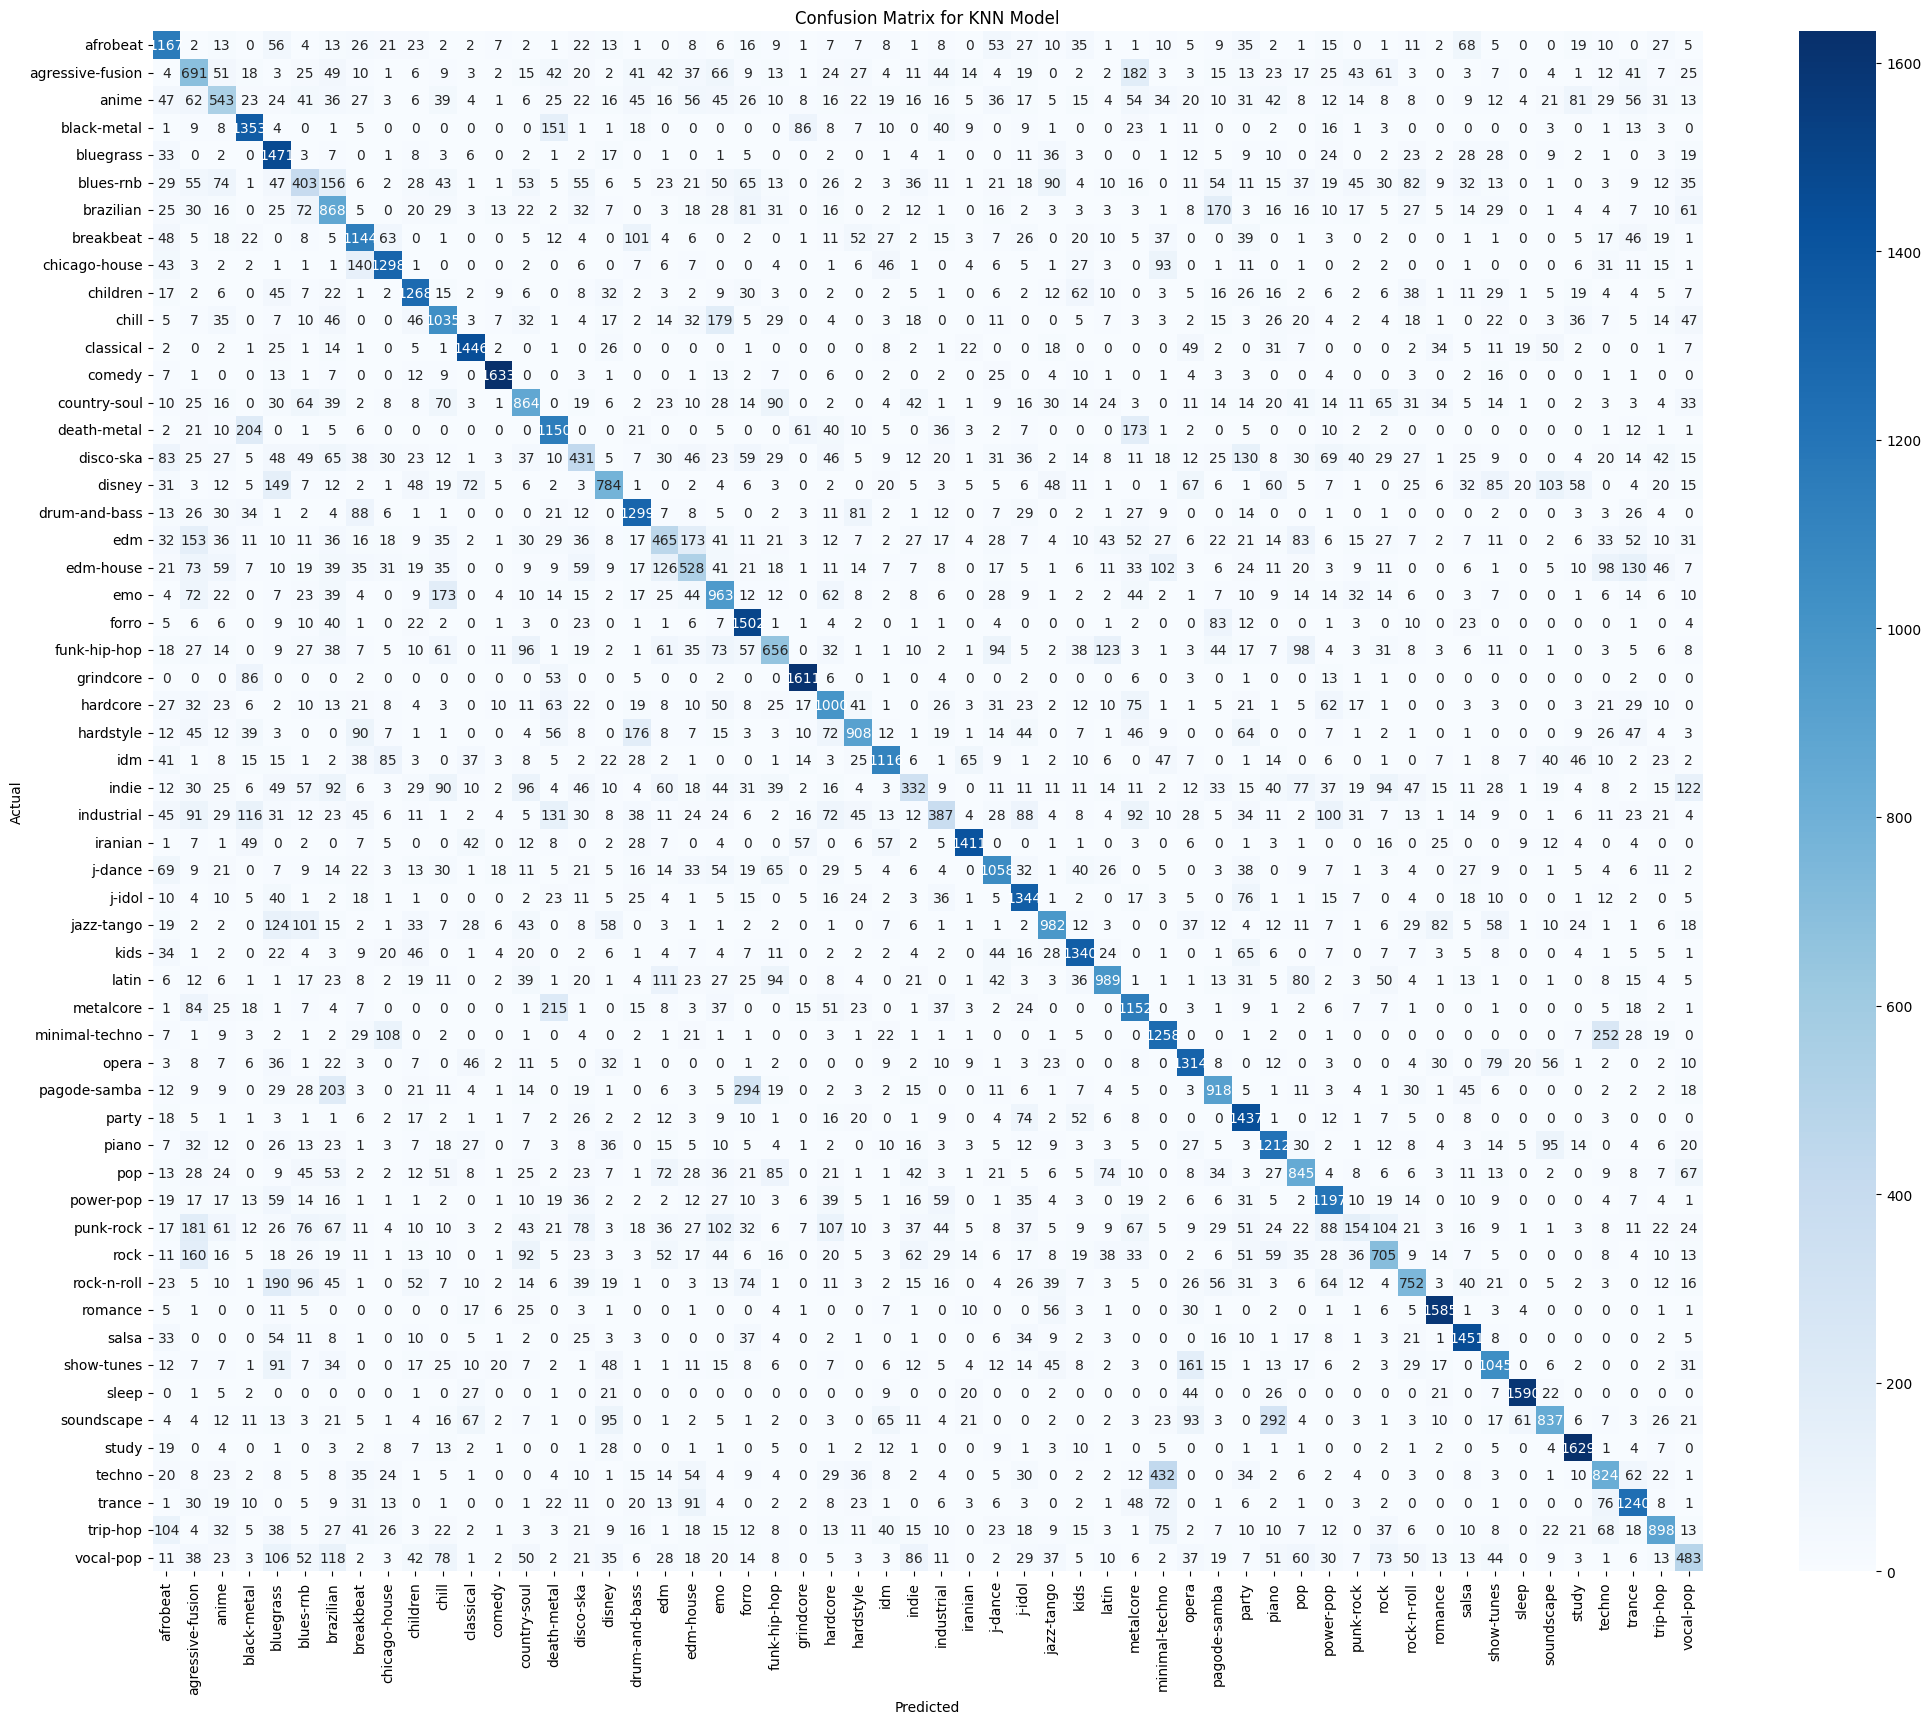

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert probability predictions to class labels
y_pred_knn_classes = np.argmax(y_pred_knn, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn_classes)

# Plot the confusion matrix
plt.figure(figsize=(25,20))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN Model")
plt.show()

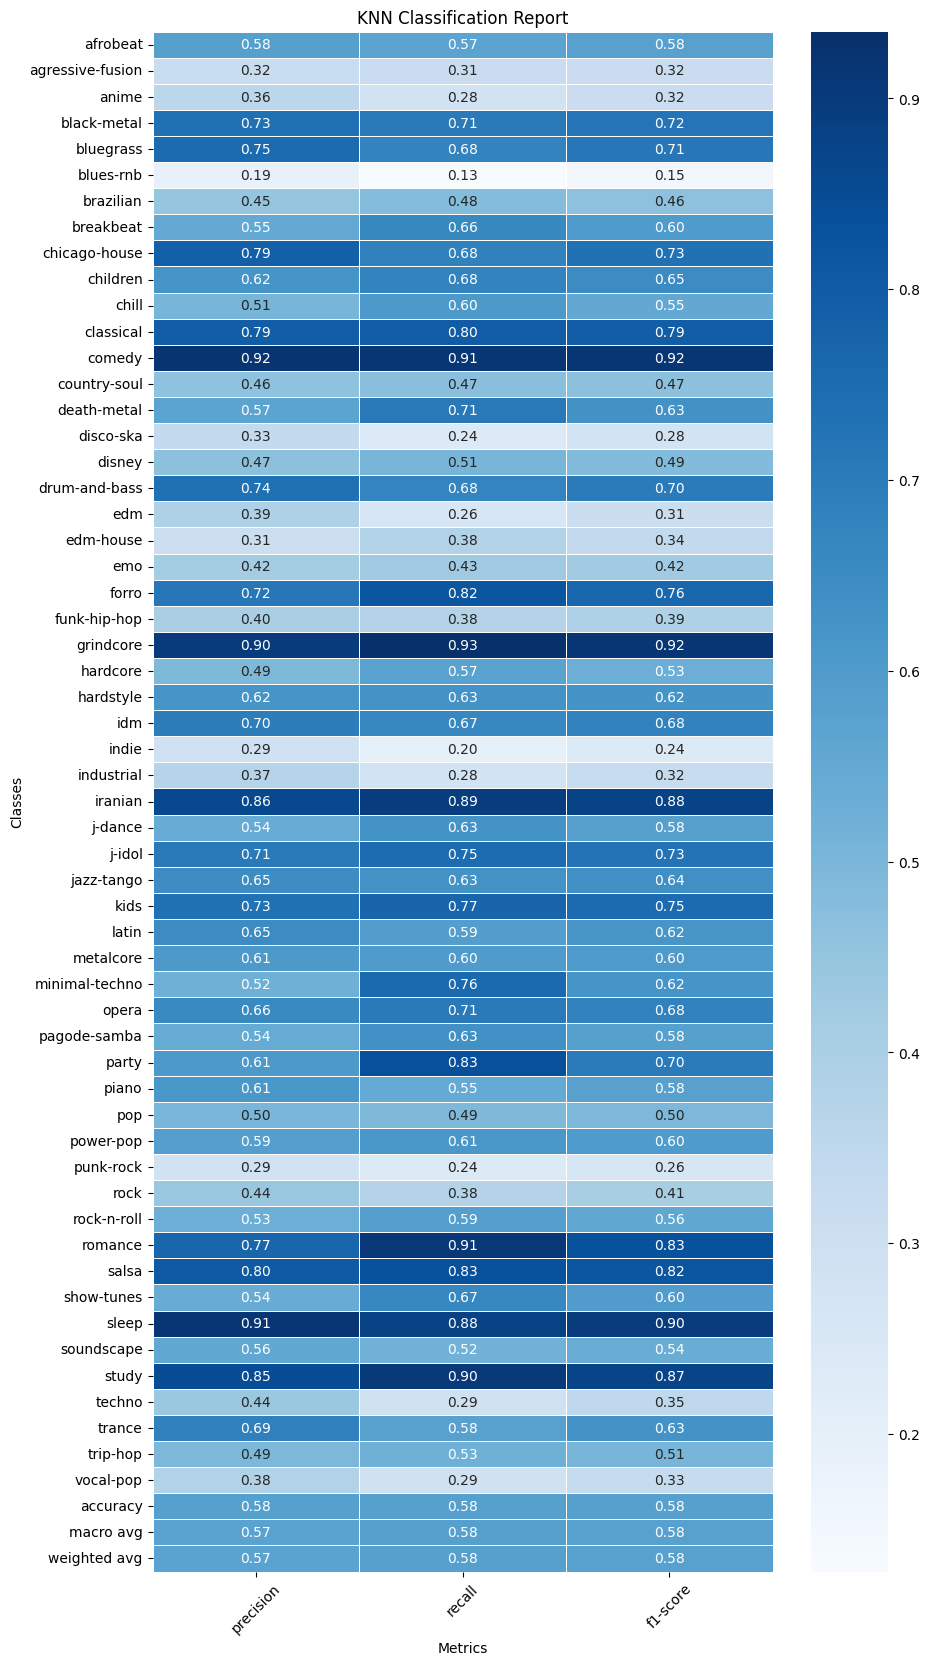

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
report_dict = classification_report(y_test, y_pred_nn_classes, target_names=label_encoder.classes_, output_dict=True)

# Convert dictionary to DataFrame (excluding support column)
report_df = pd.DataFrame(report_dict).T.drop(columns=['support'])

# Plot heatmap
plt.figure(figsize=(10, 20))
sns.heatmap(report_df, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title("KNN Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

## XGBoost


In [ ]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, seed=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict_proba(X_test)

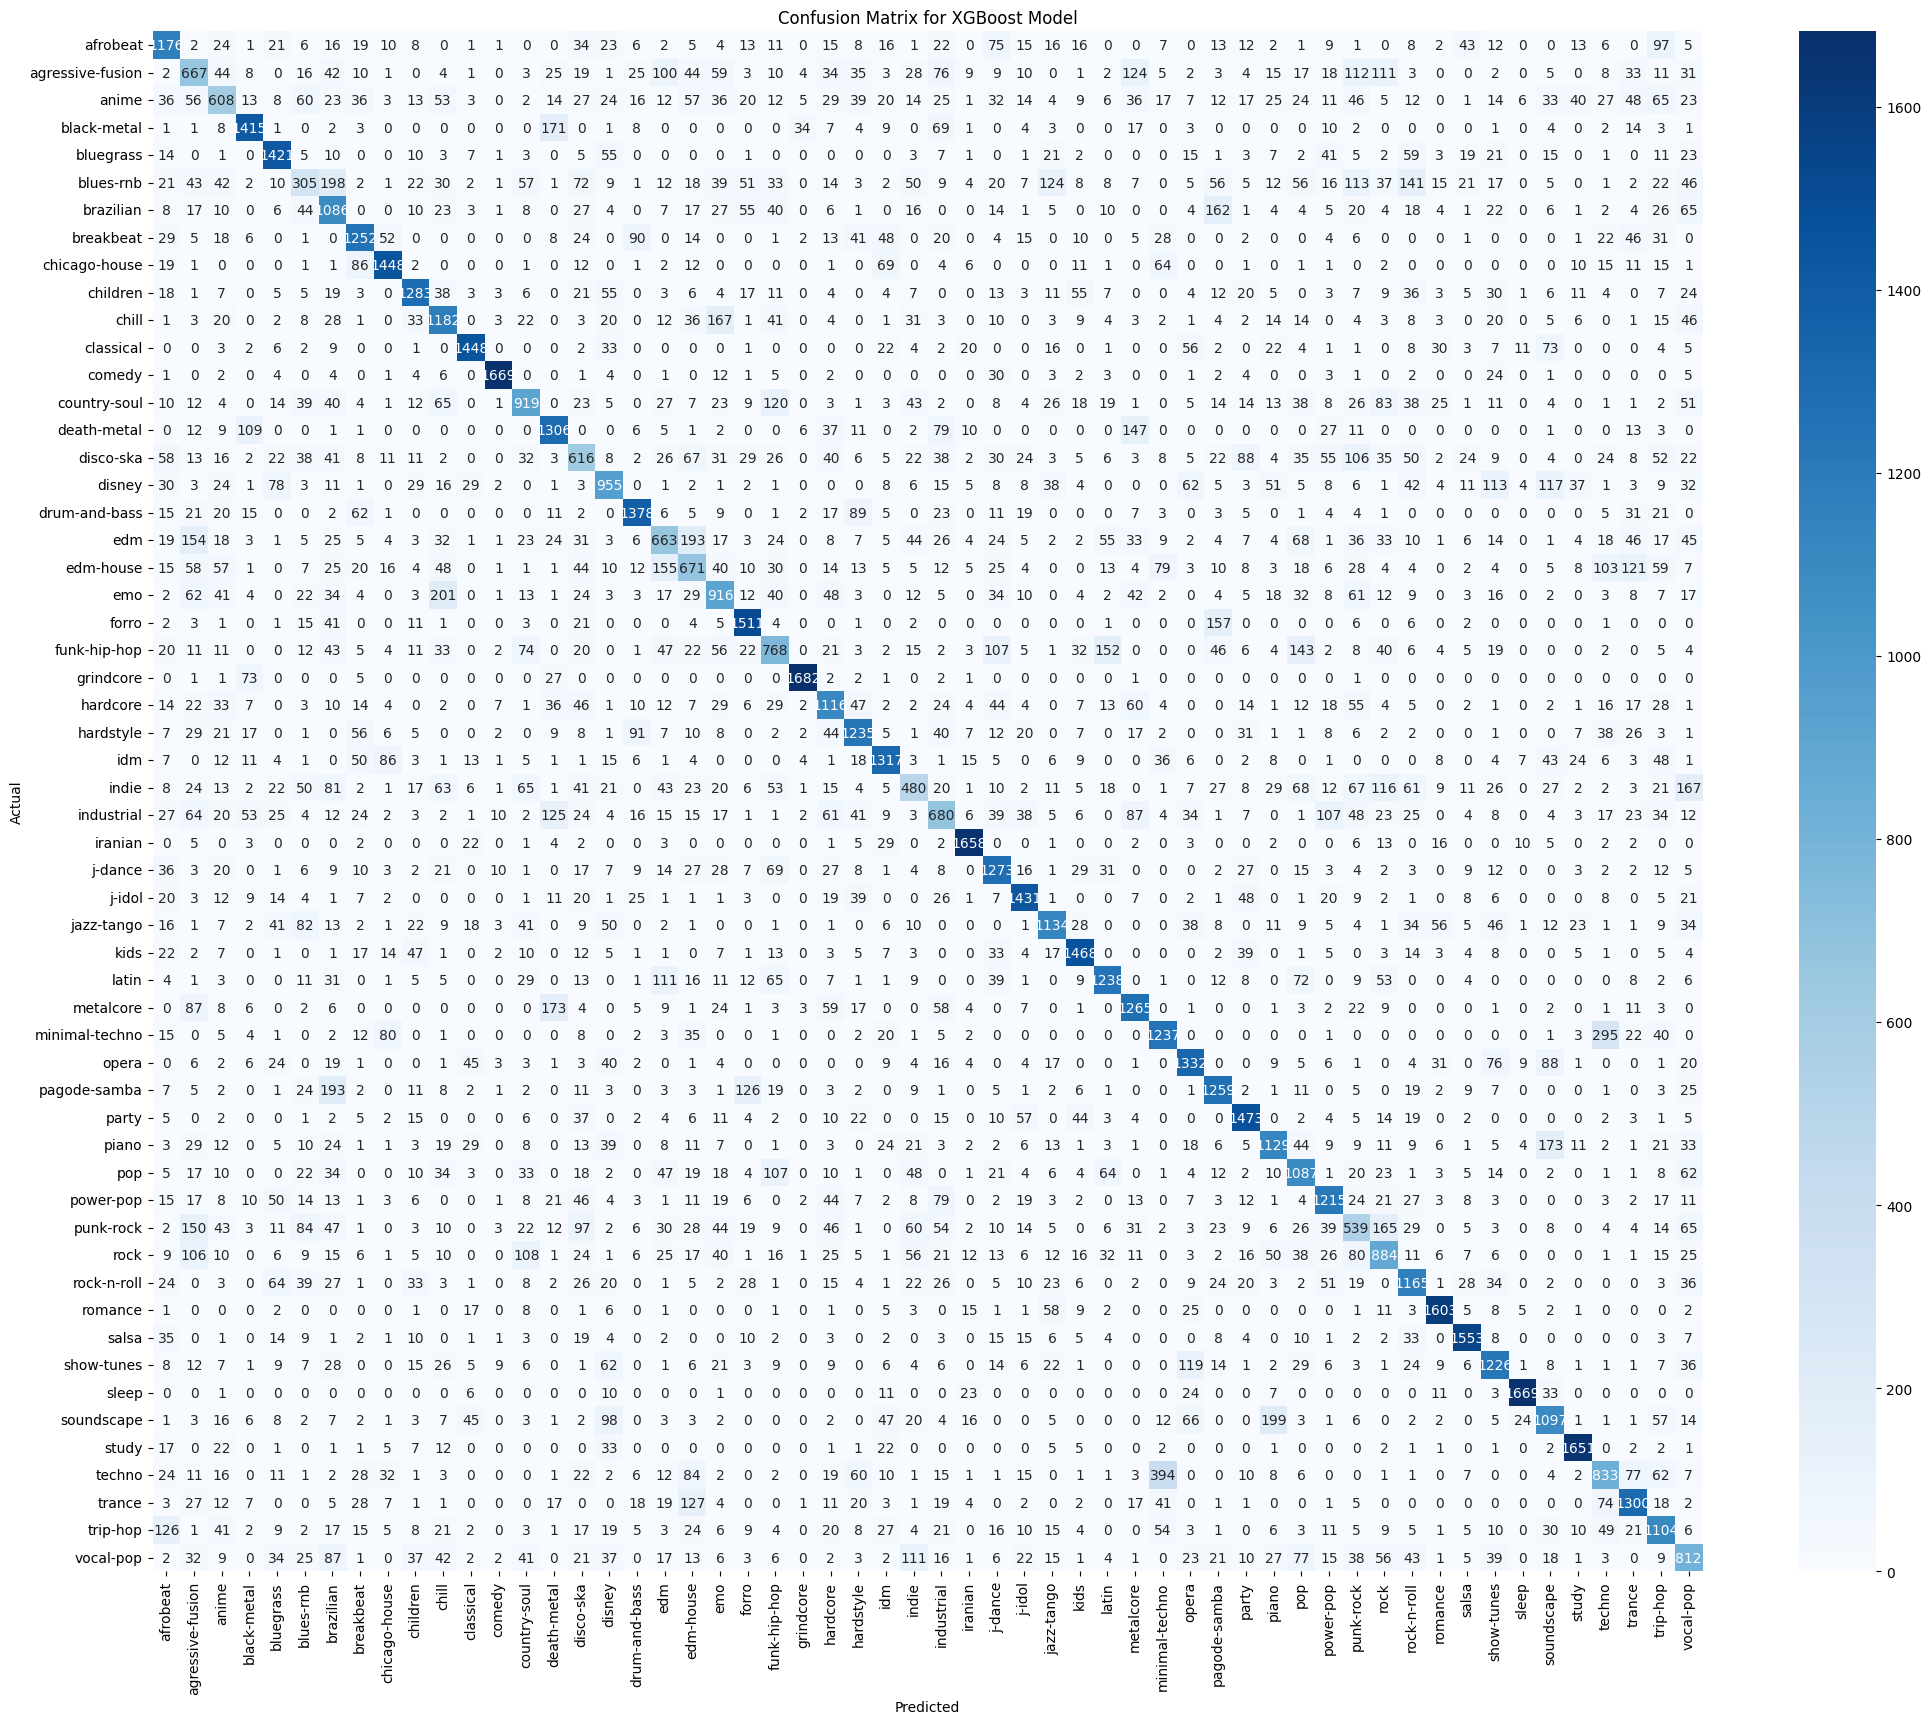

In [ ]:
# Convert probability predictions to class labels
y_pred_xgb_classes = np.argmax(y_pred_xgb, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb_classes)

# Plot the confusion matrix
plt.figure(figsize=(25,20))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

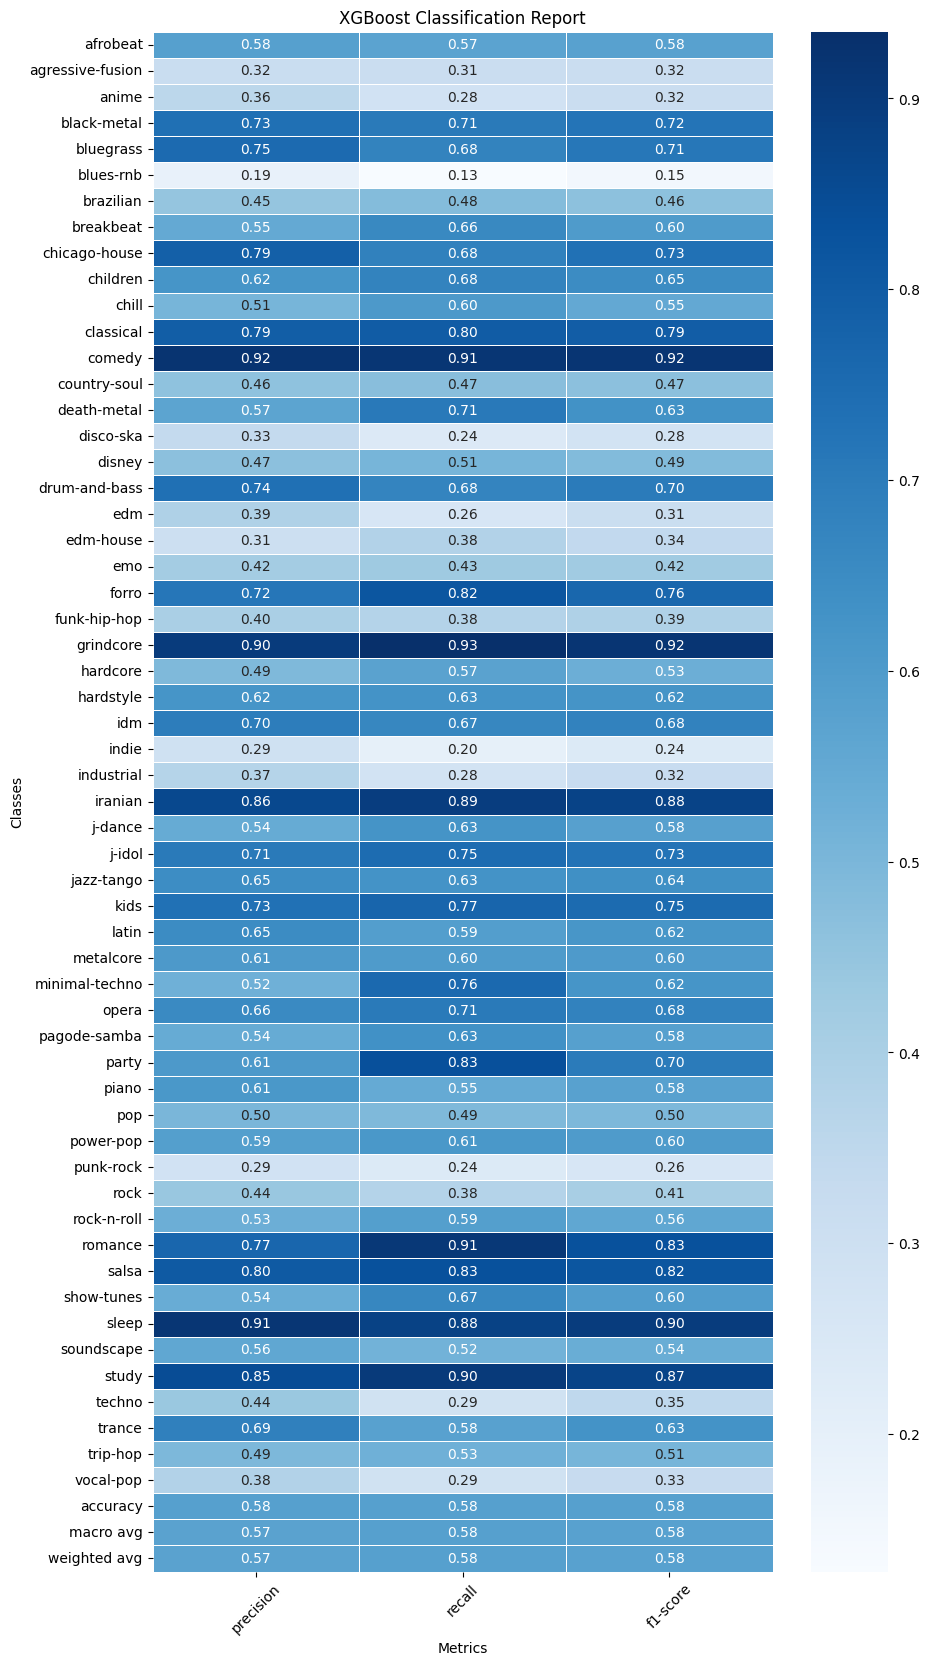

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
report_dict = classification_report(y_test, y_pred_nn_classes, target_names=label_encoder.classes_, output_dict=True)

# Convert dictionary to DataFrame (excluding support column)
report_df = pd.DataFrame(report_dict).T.drop(columns=['support'])

# Plot heatmap
plt.figure(figsize=(10, 20))
sns.heatmap(report_df, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title("XGBoost Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

# Results


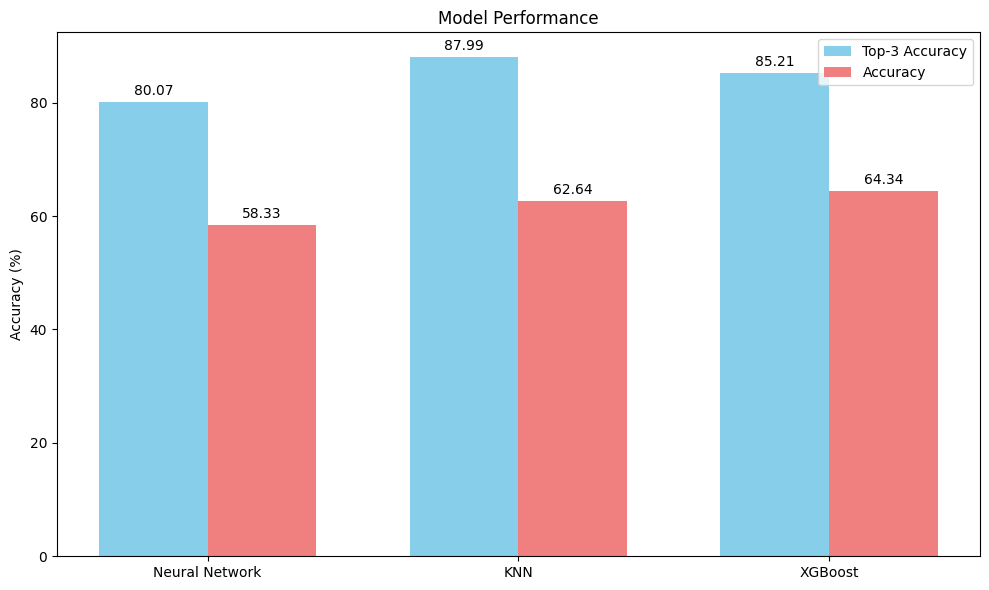

In [ ]:
def get_metrics(y_test, y_pred, k=3):


    # Convert y_pred to float32 if it's not already
    y_pred = y_pred.astype(np.float32)

    # Calculate top-k categorical accuracy
    top_k_accuracy = tf.keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_pred, k=k)
    top_k_accuracy = round(np.mean(top_k_accuracy)*100,2)

    # Calculate accuracy
    accuracy = tf.keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_pred, k=1)
    accuracy = round(np.mean(accuracy)*100,2)

    return top_k_accuracy, accuracy

models = {
     "Neural Network": y_pred_nn,
     "KNN": y_pred_knn,
     "XGBoost": y_pred_xgb
 }

model_names = list(models.keys())
top_3_accuracies = []
accuracies = []

for model_name in model_names:
  top_3_acc, acc = get_metrics(y_test, models[model_name], k=3)
  top_3_accuracies.append(top_3_acc)
  accuracies.append(acc)

x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, top_3_accuracies, width, label='Top-3 Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, accuracies, width, label='Accuracy', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Function to add labels on top of bars
def autolabel(rects):
  """Attach a text label above each bar in *rects*, displaying its height."""
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

## Results by Genre

<ipython-input-41-804114554113>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='accuracy', y='genre', data=accuracy_df, palette='viridis')


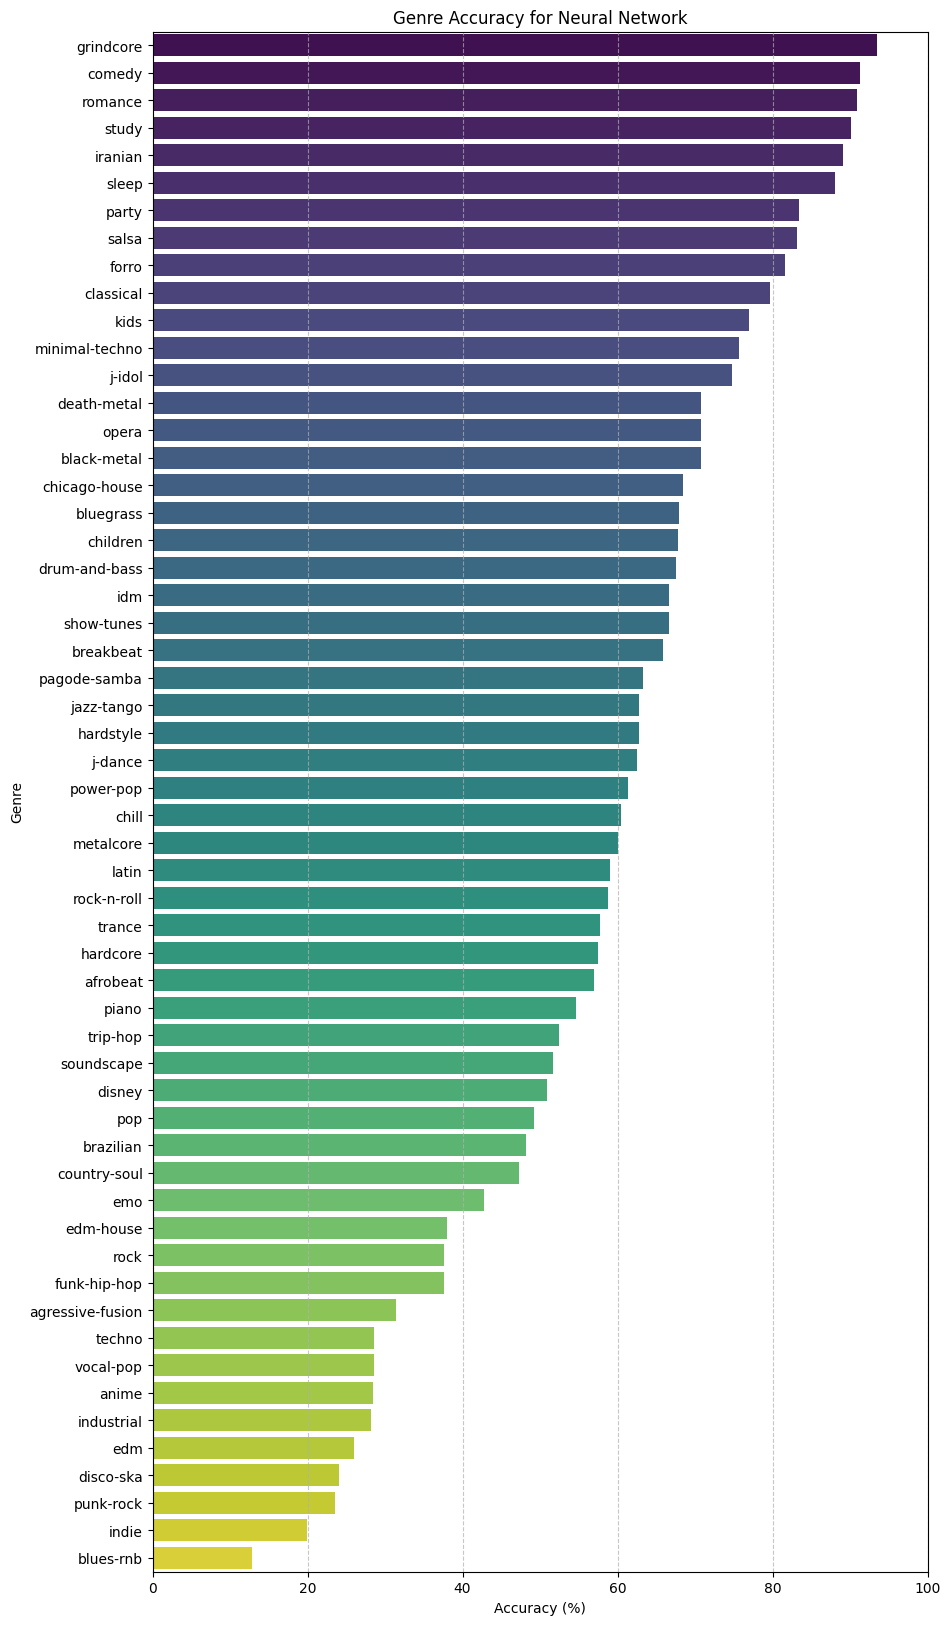

<ipython-input-41-804114554113>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='accuracy', y='genre', data=accuracy_df, palette='viridis')


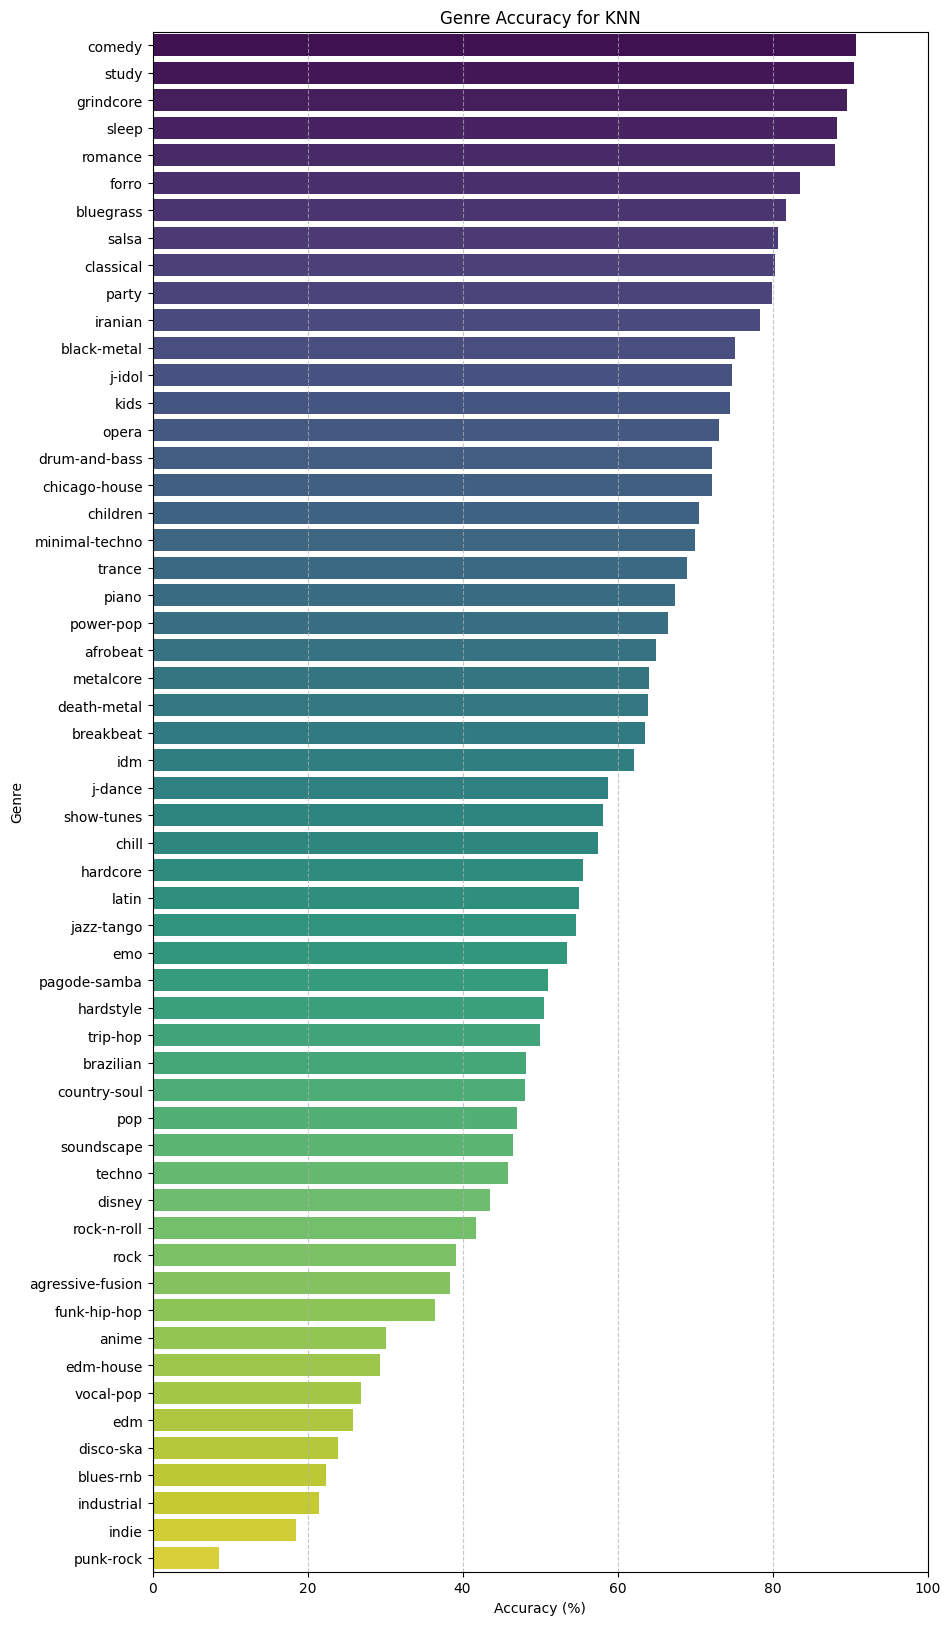

<ipython-input-41-804114554113>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='accuracy', y='genre', data=accuracy_df, palette='viridis')


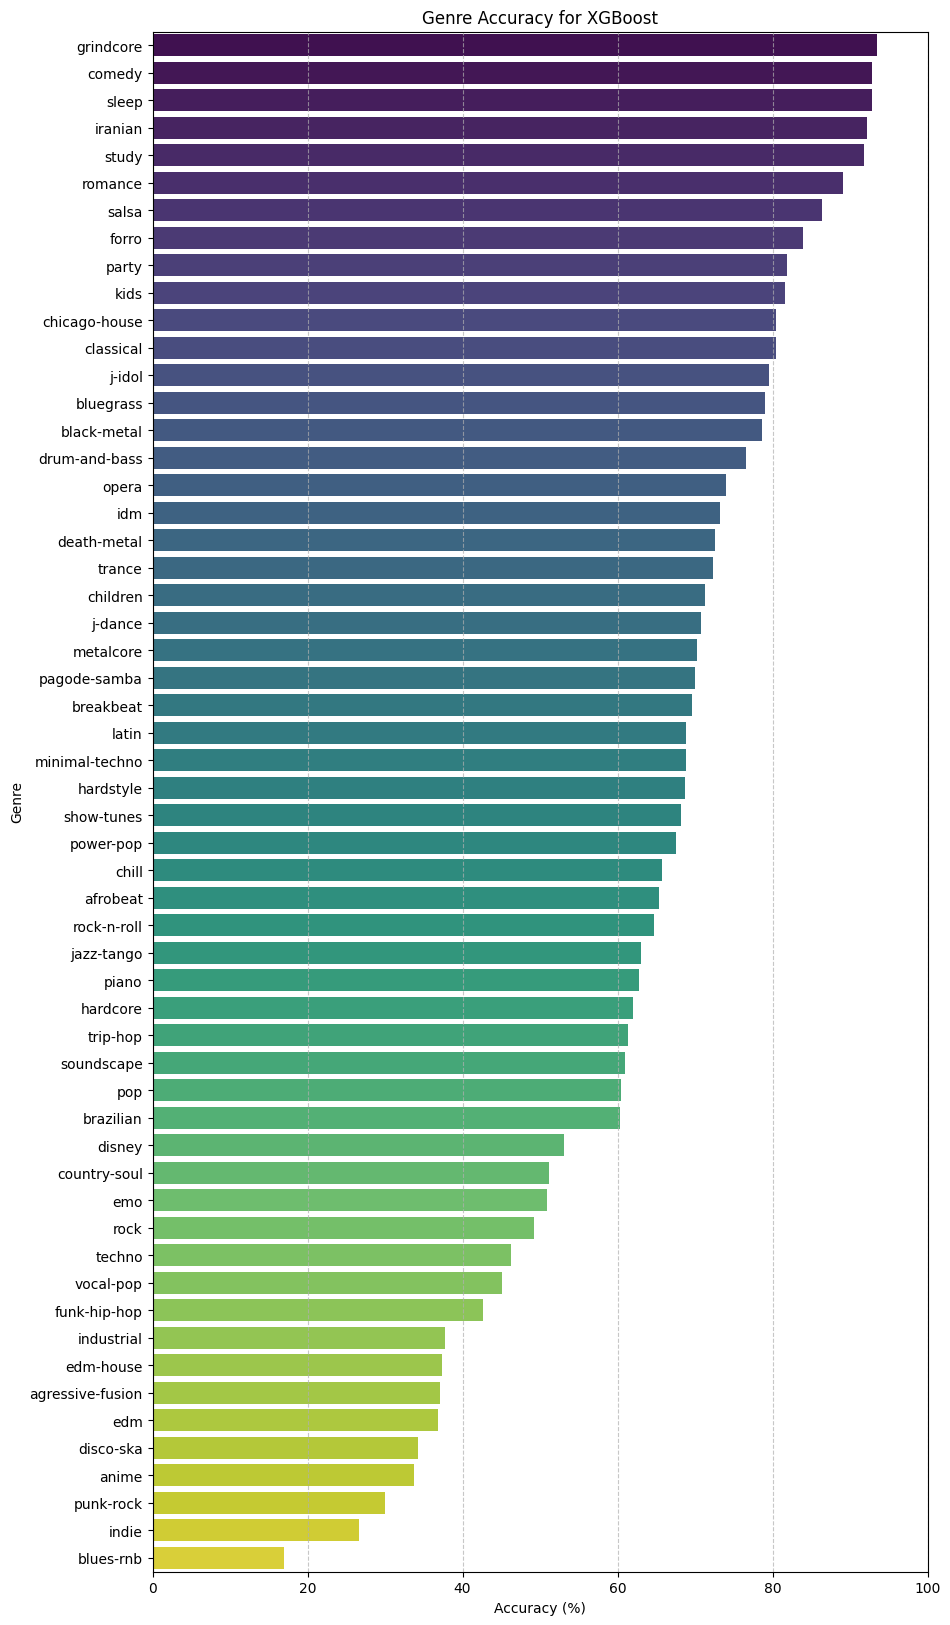

In [ ]:
from sklearn.metrics import confusion_matrix

# Store the genres encoded in the label encoder
genres = label_encoder.classes_

# Accuracy by genre
def accuracy_by_genre(y_test, y_pred):
    # Calculate confusion matrix for predicted genre labels
    matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

    # Calculate genre-wise accuracy as percentage
    matrix_pred = matrix.diagonal()/matrix.sum(axis=1)*100

    # Create DataFrame for genre-wise accuracy
    genre_accuracy = pd.DataFrame({'accuracy': matrix_pred})

    # Create DataFrames for genres and predictions
    genres_labels = pd.DataFrame(genres)

    # Label genre & prediction columns for clarity
    genres_labels.columns = ['genre']

    # Combine genre labels & accuracy, sort by descending accuracy, reset index
    accuracy_by_genre = pd.concat([genres_labels, genre_accuracy], axis=1).sort_values(by='accuracy', ascending=False).reset_index(drop=True)

    return accuracy_by_genre

# Function to plot genre accuracy for each model
def plot_accuracy_by_genre(accuracy_df, model_name):
    plt.figure(figsize=(10, 20))
    sns.barplot(x='accuracy', y='genre', data=accuracy_df, palette='viridis')
    plt.title(f'Genre Accuracy for {model_name}')
    plt.xlabel('Accuracy (%)')
    plt.ylabel('Genre')
    plt.xlim(0, 100)  # Ensure accuracy range is between 0-100%
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Dictionary of model predictions
models = {
    "Neural Network": y_pred_nn,
    "KNN": y_pred_knn,
    "XGBoost": y_pred_xgb
}

# Generate plots for each model
for model_name, model_pred in models.items():
    accuracy_df = accuracy_by_genre(y_test, model_pred)  # Compute accuracy
    plot_accuracy_by_genre(accuracy_df, model_name)  # Plot accuracy